# Most important features for a player to be drafted ? A comparative analysis of Machine Learning model

### Table Of Content

1. Exploratory Data Analysis
2. Feature engineering to select the relevant subsets
3. Pre-processing
4. Evaluate the model
5. Hyperparameter fine tuning

# 1. Initial Data Analysis and Data Cleaning

We import the relevant package before starting our analysis.

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

Importing the data

In [226]:
df = pd.read_csv('/Users/gregorycrooks/Downloads/NFL.csv')

Looking at the data, we find 

In [227]:
df.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


We find a total of 18 columns

In [228]:
len(df.columns)

18

Looking at the column types, we find:
1. <b> 11 Numerical columns </b>: Year, Age, Height, Weight, Sprint_40yd, Vertical_Jump, Bench_Press_Reps, Broad_Jump, Agility_3cone, Shuttle, BMI </br>

2. <b>7 Categorical columns </b>: Player, School, Drafted..tm.rnd.yr., Player_Type, Position_Type, Position, Drafted

In [229]:
df.dtypes

Year                     int64
Player                  object
Age                    float64
School                  object
Height                 float64
Weight                 float64
Sprint_40yd            float64
Vertical_Jump          float64
Bench_Press_Reps       float64
Broad_Jump             float64
Agility_3cone          float64
Shuttle                float64
Drafted..tm.rnd.yr.     object
BMI                    float64
Player_Type             object
Position_Type           object
Position                object
Drafted                 object
dtype: object

Check for duplicates:

In [230]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF


,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted


<b> Identifying Null values </b>

We find that some columns have a high percentage of null values. At the <b>highest</b>, 35% of the "Drafted..tm.rnd.yr." column has 35% null values. Similarly, we find that most of the columns for performances in drills tend to have a higher percentage of null values.

In [231]:
(df.isnull().sum()/(len(df)))*100

Year                    0.000000
Player                  0.000000
Age                    15.818234
School                  0.000000
Height                  0.000000
Weight                  0.000000
Sprint_40yd             5.004314
Vertical_Jump          20.046017
Bench_Press_Reps       26.028185
Broad_Jump             20.937590
Agility_3cone          35.001438
Shuttle                32.786885
Drafted..tm.rnd.yr.    35.174001
BMI                     0.000000
Player_Type             0.000000
Position_Type           0.000000
Position                0.000000
Drafted                 0.000000
dtype: float64

# 2. Data Cleaning

### Outlier Analysis

Identifying outliers is important to detect any value which is disproportionately high or small, to the extent which it would have to be removed from the data (5000 bench press reps for instance). We set our z-score threshold of 3 (values with + 3 or - 3 standard deviations from the mean).

Let's inspect each relevant variable:
1. Age seems to have a high number of upper bound outliers, with players drafted at 21+ players being drafted after 24. We find 2 lower bound outliers with 2 players drafted at 18 and 19
2. For each of drill, we tend to find outliers for players performing poorly. Inversely, outside of Bench press (8 upper bound outliers) we do not find many outliers outclassing the other players.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.10/lib/pytho

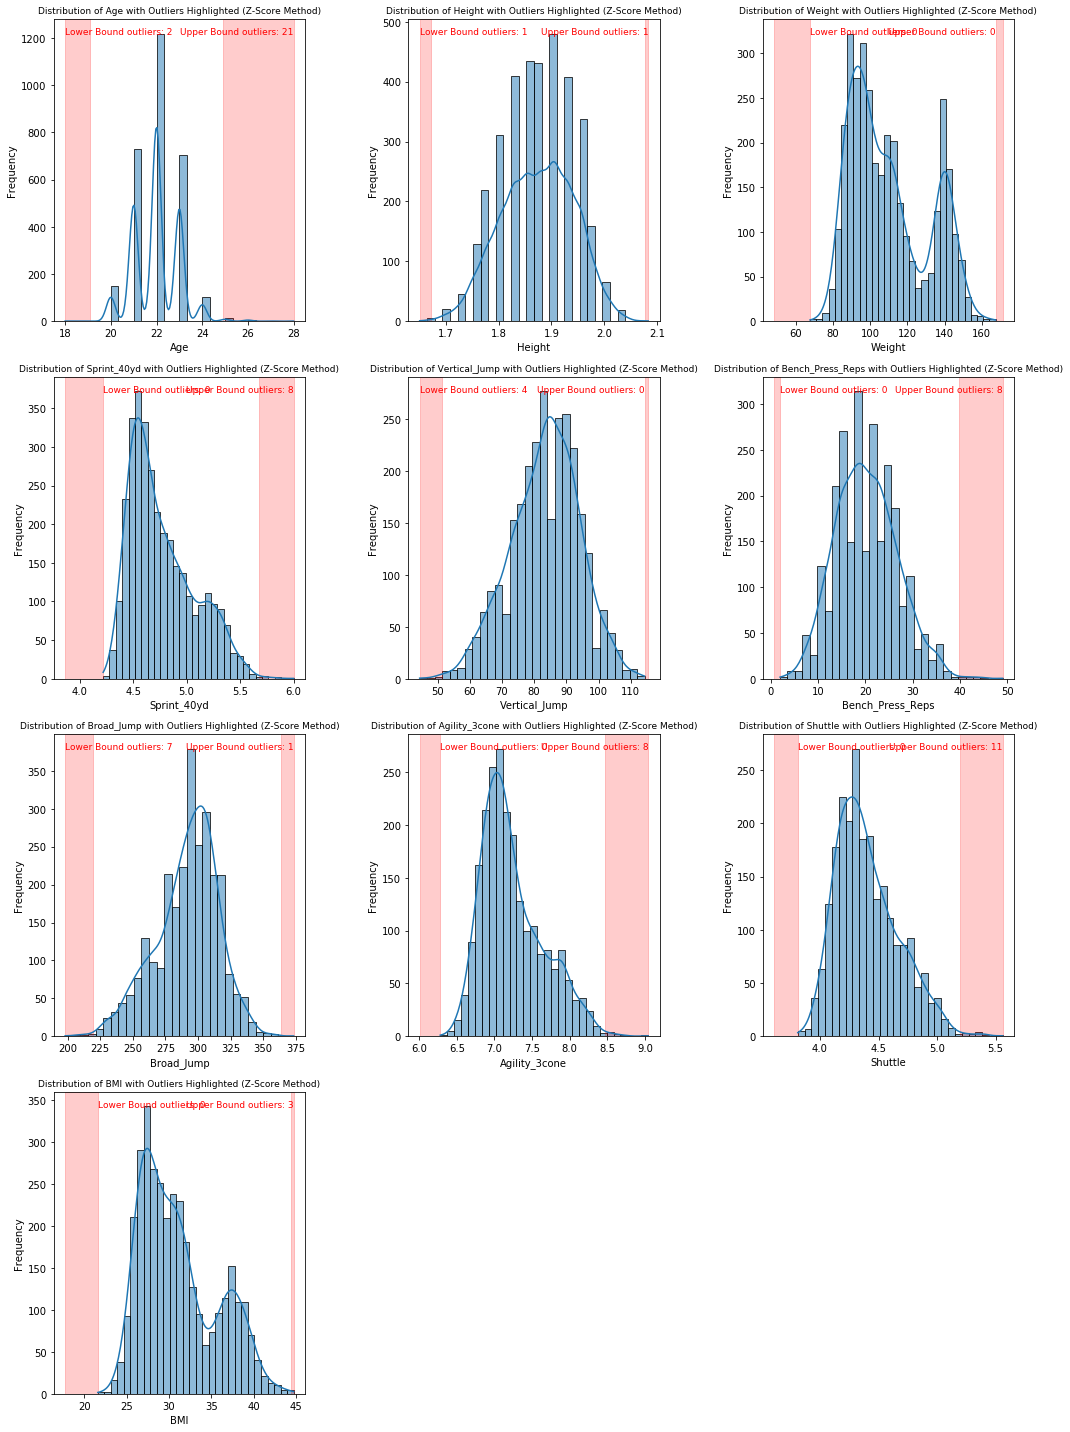

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have the necessary imports and dataframe already loaded.
num_cols = df.loc[:, df.columns != 'Year']
# Select numerical columns from the DataFrame
num_cols = num_cols.select_dtypes(include='number').columns

# Set up the figure for subplots
n_cols = 3 # Number of columns for subplots
n_rows = len(num_cols) // n_cols + int(len(num_cols) % n_cols > 0)

plt.figure(figsize=(15, 5 * n_rows))

# Loop through each numerical variable and create a subplot
for i, col in enumerate(num_cols):
    # Calculate the mean and standard deviation, ignoring NaN values
    mean = np.nanmean(df[col])
    std_dev = np.nanstd(df[col])
    
    # Calculate the lower and upper bound values based on z-scores of -3 and 3
    lower = mean - 3 * std_dev
    upper = mean + 3 * std_dev
    
    # Count outliers
    lower_outliers_count = (df[col] <= lower).sum()
    upper_outliers_count = (df[col] >= upper).sum()

    # Create subplot
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col].dropna(), kde=True, ax=ax, bins=30)  # Drop NaN values for plotting

    # Highlighting the outliers
    ax.axvspan(xmin=df[col].min(), xmax=lower, alpha=0.2, color='red')
    ax.axvspan(xmin=upper, xmax=df[col].max(), alpha=0.2, color='red')

    # Adding text annotations for outlier counts
    ax.text(df[col].min(), ax.get_ylim()[1] * 0.95, f'Lower Bound outliers: {lower_outliers_count}', color='red', fontsize=9)
    ax.text(df[col].max(), ax.get_ylim()[1] * 0.95, f'Upper Bound outliers: {upper_outliers_count}', color='red', fontsize=9, horizontalalignment='right')

    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col} with Outliers Highlighted (Z-Score Method)', fontsize=9)

plt.tight_layout()
plt.show()


### Formatting Errors

The <b> "Drafted..tm.rnd.yr." </b> contains information about the drafting team, round, pick rank, and year. Each value, if not null, has the following format: Arizona Cardinals / 1st / 31st pick / 2009. We clean this by separating this into 4 columns based on the "/" delimiter.

In [233]:
df[['Team','Round', "Pick", "Year"]] = df['Drafted..tm.rnd.yr.'].str.split('/',expand=True)

# Function to ensure only one space between words in each column
def normalize_spaces(s):
    if pd.isna(s):
        return s
    return ' '.join(s.split())

# Apply the function to each of the new columns
df['Team'] = df['Team'].apply(normalize_spaces)
df['Round'] = df['Round'].apply(normalize_spaces)
df['Pick'] = df['Pick'].apply(normalize_spaces)
df['Year'] = df['Year'].apply(normalize_spaces)

df = df.drop(columns=["Drafted..tm.rnd.yr."]) 

# Display the first few rows to verify the result
df[['Team', 'Round', 'Pick', 'Year']].head()

,Team,Round,Pick,Year
0,Arizona Cardinals,1st,31st pick,2009
1,Arizona Cardinals,6th,204th pick,2009
2,Arizona Cardinals,5th,167th pick,2009
3,Arizona Cardinals,3rd,95th pick,2009
4,Arizona Cardinals,2nd,63rd pick,2009


The <b> Round and Pick</b> columns are numerical and might provide relevant information. Let's remove all letters and convert them to numerical values:

In [234]:
import re
def omit_letters(s):
    if pd.isna(s):
        return s
    return re.sub('[^0-9]','', s)
df['Round'] = df['Round'].apply(omit_letters)
df['Pick'] = df['Pick'].apply(omit_letters)
df['Pick'] = df['Pick'].astype(float).astype('Int64')
df['Round'] = df['Round'].astype(float).astype('Int64')

The <b> "Player" </b> column values are occasionaly formatted with the player name followed by a backslash, and what looks to be a Username: "Beanie Wells\WellCh00". To resolve this, we remove the backslash symbol and any set of string after.

In [235]:
def normalize_spaces(s):
    if pd.isna(s):
        return s
    return ' '.join(s.split())

# Step 3: Apply the function to the 'Player' column to normalize spaces
df['Player'] = df['Player'].apply(normalize_spaces)

df['Player'] = df['Player'].str.split('\\').str[0]
df['Player'].head()

0      Beanie Wells
1        Will Davis
2    Herman Johnson
3    Rashad Johnson
4        Cody Brown
Name: Player, dtype: object

For the sake of better visualization, we have each first letter of the <b> Player Type</b> column in upper case format

In [236]:
df['Player_Type'] = df['Player_Type'].str.title()

df['Player_Type'].head()

0    Offense
1    Defense
2    Offense
3    Defense
4    Defense
Name: Player_Type, dtype: object

Likewise, values in the <b> "Position_Types" </b> column are oddly formatted. Let's replace them with improved formatting:

In [237]:
df["Position_Type"].value_counts()

backs_receivers       1260
defensive_back         657
offensive_lineman      555
defensive_lineman      501
line_backer            380
kicking_specialist     111
other_special           13
Name: Position_Type, dtype: int64

In [238]:
# Define the mapping dictionary
position_mapping = {
    "backs_receivers": "Backs/Receivers",
    "defensive_back": "Defensive Back",
    "offensive_lineman": "Offensive Lineman",
    "defensive_lineman": "Defensive Lineman",
    "line_backer": "Linebacker",
    "kicking_specialist": "Kicking Specialist",
    "other_special": "Other Special"
}

# Apply the mapping to the Position_Type column
df["Position_Type"] = df["Position_Type"].replace(position_mapping)
df["Position_Type"].head()

0      Backs/Receivers
1    Defensive Lineman
2    Offensive Lineman
3       Defensive Back
4           Linebacker
Name: Position_Type, dtype: object

<b> Let's drop irrelevant columns:

Year is a duplicate of the already existing "Year" column

In [239]:
df = df.drop(columns=["Year"])

### Dealing with Null Values

<b> Team column:</b> The "Team" column has NAs for players with aren't drafted

In [240]:
df['Team'] = df['Team'].fillna("Not Drafted")


<b> Round column </b> let's create an arbitrary column for players which aren't drafted. Which will be used to find relationships with the drafted status.

In [241]:
df['Round'] = df['Round'].fillna(8)
df['Round'] = df['Round'].astype(int)
df['Round'].value_counts()

8    1223
3     361
4     356
5     337
1     329
2     328
6     284
7     259
Name: Round, dtype: int64

<b> Multivariate Linear Regression: </b>Identifying signifcant correlations for model predictor to fill missing values

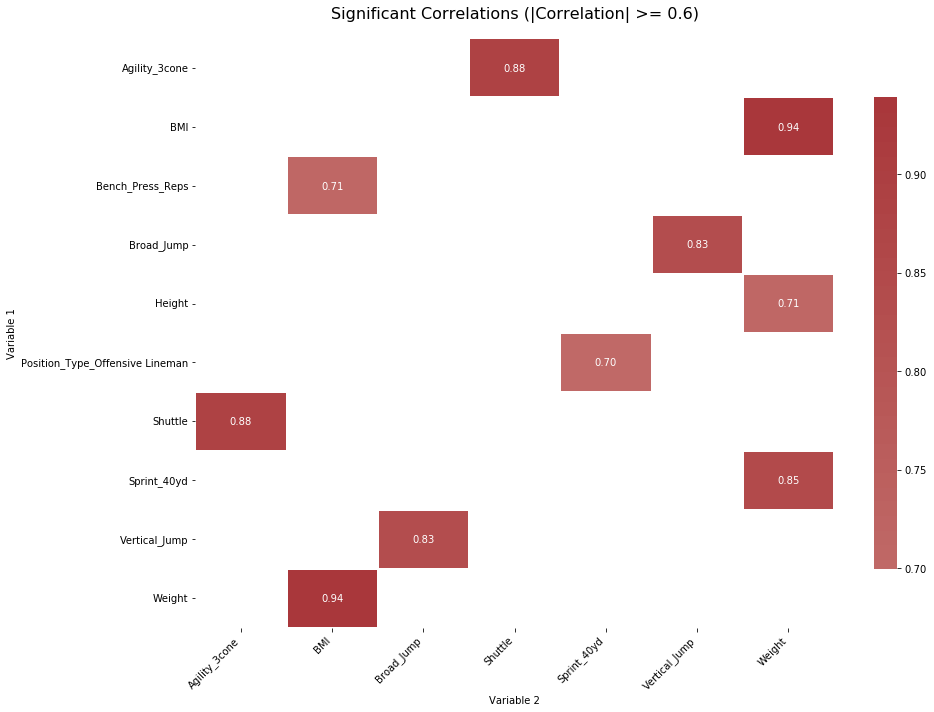

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select the relevant columns including categorical ones
df_Regression = df.loc[:, ['Weight', 'Sprint_40yd', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Vertical_Jump', 'Shuttle', 'BMI', 'Height', 'Drafted', 'Position_Type', 'Position']]

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df_Regression, columns=['Position', 'Position_Type'])

# Remove stratified columns if any
df_encoded = df_encoded[[x for x in df_encoded if not x.endswith('_Strat')]]    

# Step 1: Identify correlated columns (without taking absolute values to preserve sign)
correlation_matrix = df_encoded.corr()

# Find pairs with an absolute correlation of 60% or more
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlation pairs (correlations with themselves)
high_corr_pairs = high_corr_pairs[high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2']]

# Identify one-hot encoded variables
one_hot_encoded_vars = [col for col in df_encoded.columns if col.startswith('Position_') or col.startswith('Drafted_')]

# Exclude pairs where both variables are one-hot encoded
high_corr_pairs = high_corr_pairs[
    ~((high_corr_pairs['Variable 1'].isin(one_hot_encoded_vars)) & (high_corr_pairs['Variable 2'].isin(one_hot_encoded_vars)))
]

# Filter out correlations that are exactly 1 or -1 and keep only those with |Correlation| >= 0.6
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'].abs() >= 0.6) & (high_corr_pairs['Correlation'].abs() < 1.0)]

# Sort by the absolute value of the correlation in descending order
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

# Keep only the highest absolute correlation for each unique Variable 1
unique_high_corr_pairs = high_corr_pairs.groupby('Variable 1').first().reset_index()

# Pivot the data for heatmap visualization
pivot_table = unique_high_corr_pairs.pivot(index='Variable 1', columns='Variable 2', values='Correlation')

# Plot the heatmap using Seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap='vlag', center=0, linewidths=1, linecolor='white', cbar_kws={'shrink': 0.8}, fmt='.2f', annot_kws={'size': 10})

# Customize the heatmap for better visual appeal
plt.title('Significant Correlations (|Correlation| >= 0.6)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


<b> Multivariate linear Regression</b>: <br><br> We use multivariate <b> Linear Regression model</b> to replace null values. For each missing value within q numerical variable column, we find all the numerical variables which: 
1. Are non-null 
2. Have a strong correlation (positive or negative)

We also hot-one encode the categorical variables, and identify the most highly correlated values. Offensive linemen have a strong relationship with some of the numerical feature, so we include them to the regression model in order to predict the missing values.

In [243]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


# Select the relevant columns including categorical ones
df_Regression = df.loc[:, ['Weight', 'Sprint_40yd', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Vertical_Jump', 'Shuttle', 'BMI', 'Height', 'Drafted', 'Position_Type']]

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df_Regression, columns=['Drafted', 'Position_Type'])

#Remove strats
df_encoded = df_encoded[[x for x in df_encoded if not x.endswith('_Strat')]]    
# Step 1: Identify highly correlated columns
correlation_matrix = df_encoded.corr().abs()

# We want to find pairs with a correlation of 70% or more
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] >= 0.6]

# Step 2: Function to predict and fill missing values using multiple explanatory variables
def fill_missing_values_multivariable(df, col_to_fill, explanatory_vars):
    # One hot encoding categorical variables to include in the predictor
    df = pd.get_dummies(df, columns=['Drafted', 'Position_Type'])
    # Separate the data into those with and without missing values
    non_null_df = df[df[col_to_fill].notnull()]
    null_df = df[df[col_to_fill].isnull()]
    # If there's no missing value, return the column as is
    if null_df.empty:
        return df[col_to_fill]
    
    # Ensure that we only use explanatory variables that are not null
    explanatory_vars = [var for var in explanatory_vars if var in df.columns and df[var].isnull().sum() == 0]
    
    
    # Train a linear regression model on non-null data
    X_train = non_null_df[explanatory_vars]
    y_train = non_null_df[col_to_fill]
    X_train
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the missing values
    X_predict = null_df[explanatory_vars]
    y_predict = model.predict(X_predict)
    
    # Fill the missing values with the predictions
    df.loc[df[col_to_fill].isnull(), col_to_fill] = y_predict
    
    return df[col_to_fill]

# Step 3: Apply the model to fill missing values for each column
columns_to_predict = ['Shuttle', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', "Age"]

for col in columns_to_predict:
    explanatory_vars = [c for c in columns_to_predict if c != col]
    df[col] = fill_missing_values_multivariable(df, col, explanatory_vars)

# Display the DataFrame after filling missing values
df = df[[x for x in df if not x.endswith('_Strat')]]  
df.head()

,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Player_Type,Position_Type,Position,Drafted,Team,Round,Pick
0,Beanie Wells,20.0,Ohio St.,1.8542,106.594207,4.38,85.090000,25.0,325.120000,7.083763,4.358944,31.004194,Offense,Backs/Receivers,RB,Yes,Arizona Cardinals,1,31
1,Will Davis,22.0,Illinois,1.8796,118.387609,4.84,83.820000,27.0,292.100000,7.380000,4.450000,33.510073,Defense,Defensive Lineman,DE,Yes,Arizona Cardinals,6,204
2,Herman Johnson,24.0,LSU,2.0066,165.107623,5.50,63.893789,21.0,243.153925,8.122168,4.949310,41.005821,Offense,Offensive Lineman,OG,Yes,Arizona Cardinals,5,167
3,Rashad Johnson,23.0,Alabama,1.8034,92.079251,4.49,93.980000,15.0,304.800000,7.090000,4.230000,28.312463,Defense,Defensive Back,FS,Yes,Arizona Cardinals,3,95
4,Cody Brown,22.0,Connecticut,1.8796,110.676538,4.76,92.710000,26.0,304.800000,7.100000,4.400000,31.327425,Defense,Linebacker,OLB,Yes,Arizona Cardinals,2,63


# Exploratory Data Analysis

### Correlation Analysis

<b> Correlation Between Numerical Variables:</b><br>
Despite shuttle missing 35% of its values, we are able to create weight classes and find the mean of each other variable for all other columns. To illustrate this, let's create a graph highlighting the mean shuttle for the different weight classes.; As highlighted by the graph: the strong relationship between shuttle time and weight is represented. The bigger the weight class, the higher the mean shuttle. The relevancy of this with regards to missing values is replacing missing values by the mean of the strata. For instance, if a player is between 160 and 167kg, then we replace the null shuttle value with the 4.95 shuttle. Despite the very high collinearity amongst numerical variables, we are still interested in retaining them since we want to see how each individual feature influences the probability of being drafted

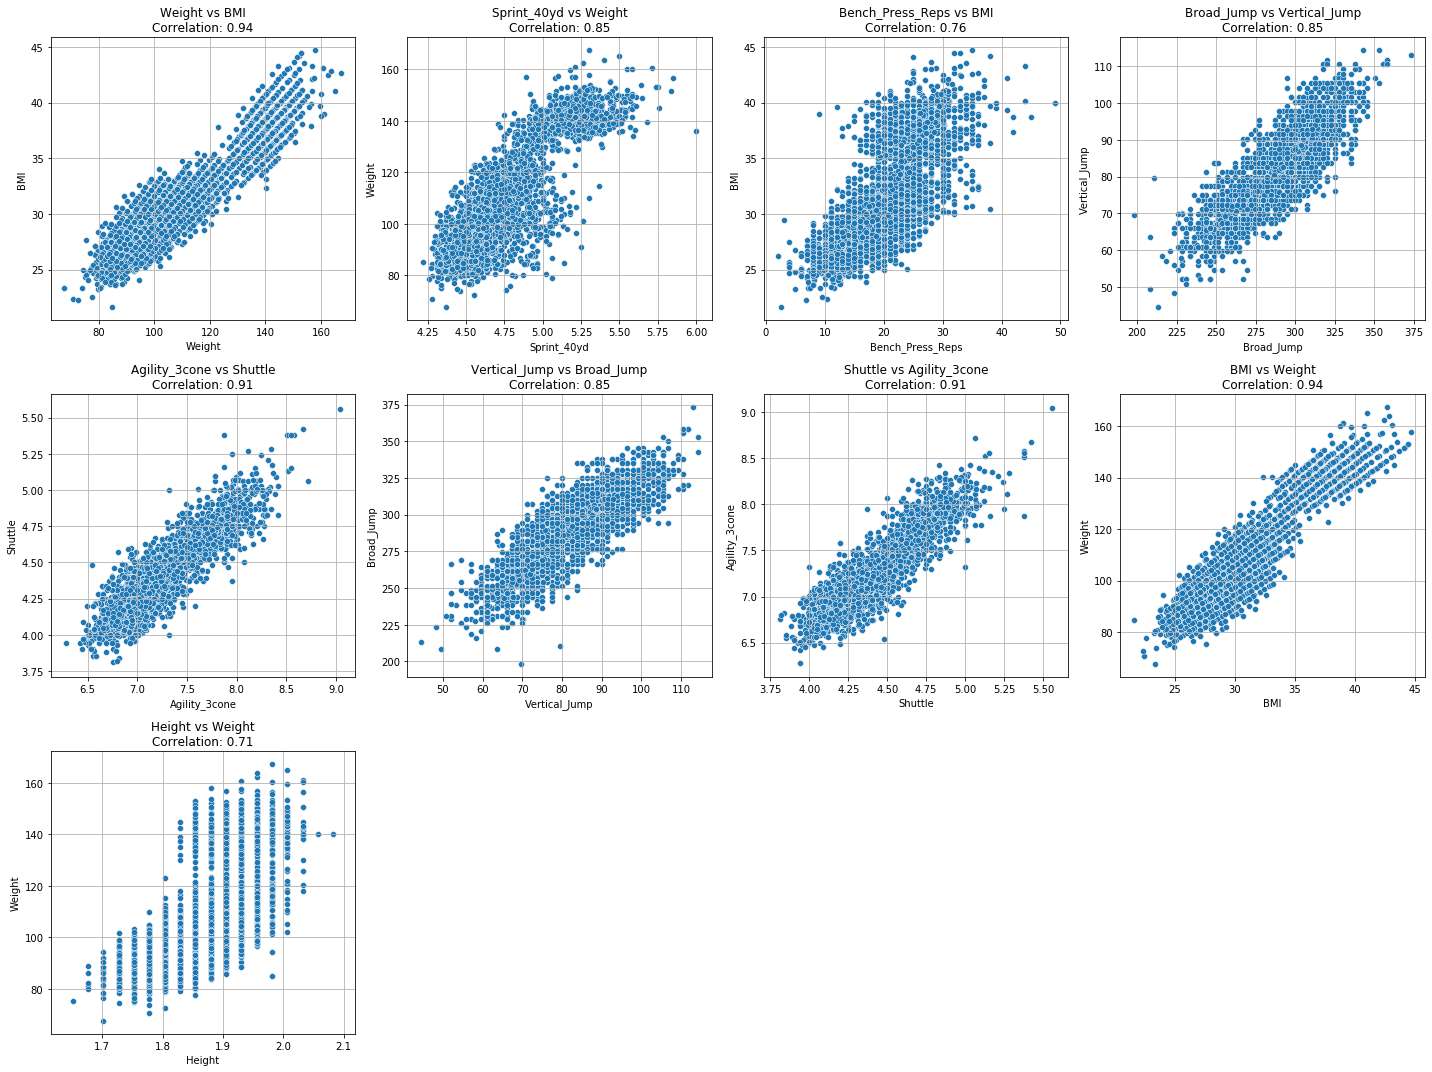

In [244]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and it already contains one-hot encoded variables
# List of numerical columns
numerical_columns = ['Weight', 'Sprint_40yd', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Vertical_Jump', 'Shuttle', 'BMI', 'Height']

# List of one-hot encoded columns (assuming they start with 'Position_' or 'Drafted_')
encoded_columns = [col for col in df.columns if col.startswith('Position') or col.startswith('Drafted_')]

# Combine numerical and encoded columns
all_columns = numerical_columns + encoded_columns

# Calculate the correlation matrix for the combined columns
correlation_matrix = df[all_columns].corr()

# Find the variable with the highest correlation for each variable
highest_correlation = {}
for col in correlation_matrix.columns:
    # Exclude self-correlation by setting it to NaN
    correlation_matrix.loc[col, col] = np.nan
    # Find the maximum correlation value and its corresponding variable
    max_corr_value = correlation_matrix[col].max()
    max_corr_var = correlation_matrix[col].idxmax()
    highest_correlation[col] = (max_corr_var, max_corr_value)

# Convert the result to a DataFrame for better visualization
highest_correlation_df = pd.DataFrame(highest_correlation, index=['Most Correlated Variable', 'Correlation Coefficient']).T

# Create a grid of plots (4 plots per row)
num_vars = len(highest_correlation_df)
fig, axes = plt.subplots((num_vars + 3) // 4, 4, figsize=(20, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plotting each pair
for i, (var, row) in enumerate(highest_correlation_df.iterrows()):
    most_corr_var = row['Most Correlated Variable']
    sns.scatterplot(data=df, x=var, y=most_corr_var, ax=axes[i])
    axes[i].set_title(f'{var} vs {most_corr_var}\nCorrelation: {row["Correlation Coefficient"]:.2f}')
    axes[i].grid(True)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<b> Relationship between Categorical Variables </b>

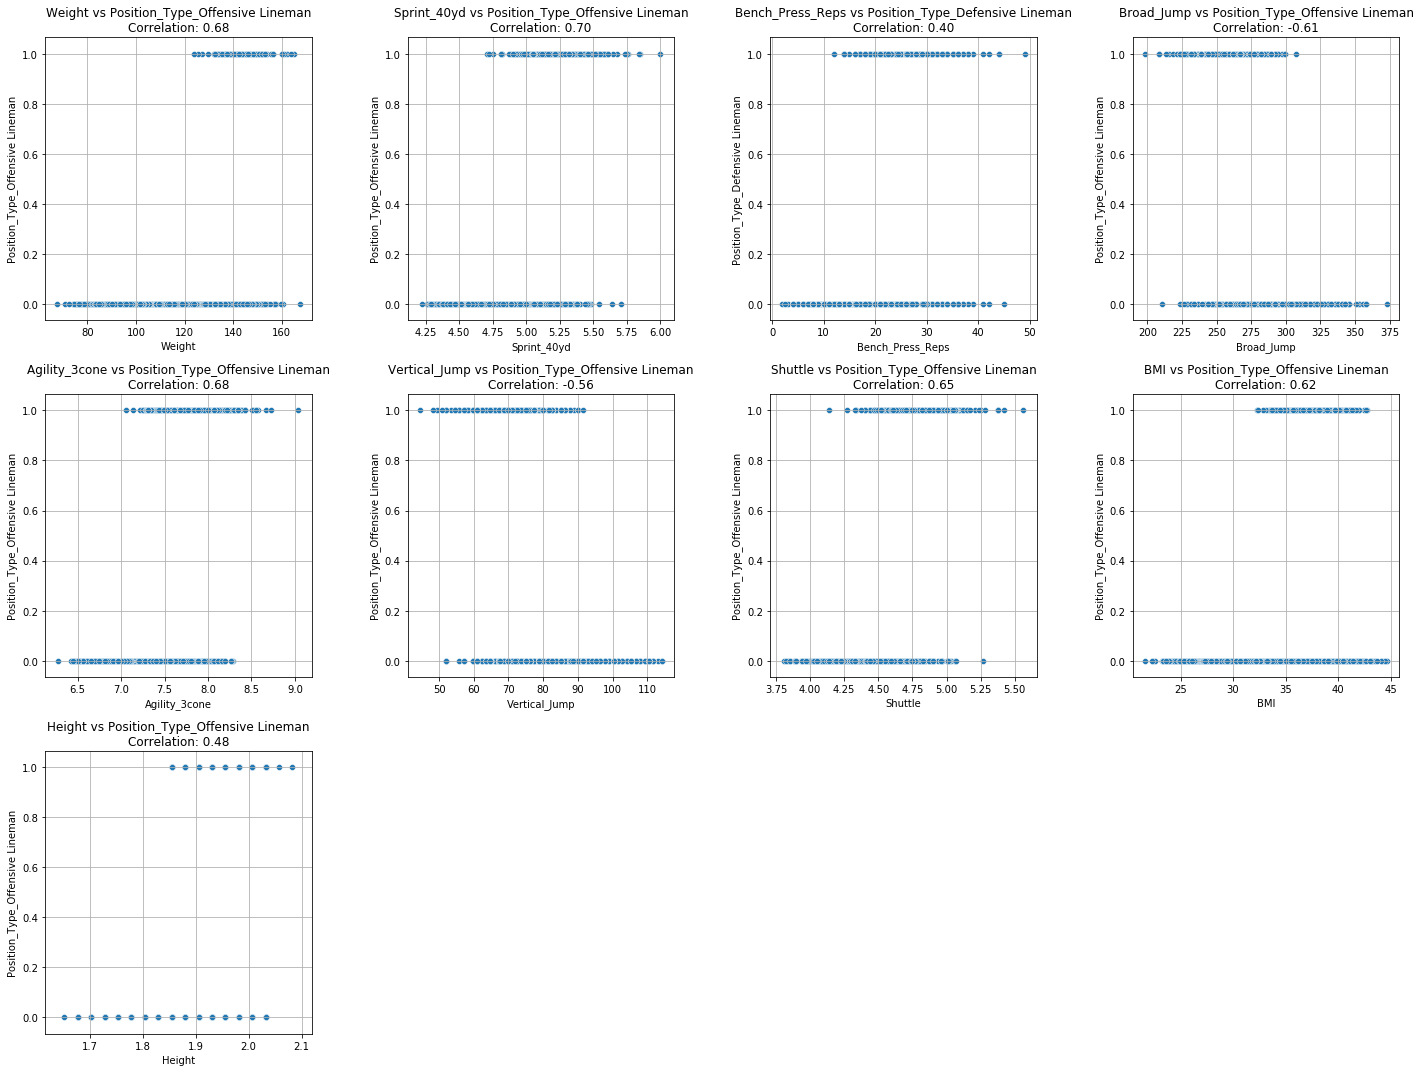

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select the relevant columns including categorical ones
df_encoded = df.loc[:, ['Weight', 'Sprint_40yd', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Vertical_Jump', 'Shuttle', 'BMI', 'Height', 'Drafted', 'Position_Type']]

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['Drafted', 'Position_Type'])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Filter for correlations between numerical and one-hot encoded variables
# Extracting correlations for the numerical variables with any "Drafted_" or "Position_" variables
numerical_columns = ['Weight', 'Sprint_40yd', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Vertical_Jump', 'Shuttle', 'BMI', 'Height']
encoded_columns = [col for col in df_encoded.columns if col.startswith('Drafted_') or col.startswith('Position_')]

# Find the highest correlation for each numerical variable with any one-hot encoded variable
highest_correlation = {}
for num_col in numerical_columns:
    max_corr_value = None
    max_corr_var = None
    for enc_col in encoded_columns:
        corr_value = correlation_matrix.loc[num_col, enc_col]
        if max_corr_value is None or abs(corr_value) > abs(max_corr_value):
            max_corr_value = corr_value
            max_corr_var = enc_col
    highest_correlation[num_col] = (max_corr_var, max_corr_value)

# Convert the result to a DataFrame for better visualization
highest_correlation_df = pd.DataFrame(highest_correlation, index=['Most Correlated Variable', 'Correlation Coefficient']).T

# Create a grid of plots (4 plots per row)
num_vars = len(highest_correlation_df)
fig, axes = plt.subplots((num_vars + 3) // 4, 4, figsize=(20, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plotting each pair
for i, (var, row) in enumerate(highest_correlation_df.iterrows()):
    most_corr_var = row['Most Correlated Variable']
    sns.scatterplot(data=df_encoded, x=var, y=most_corr_var, ax=axes[i])
    axes[i].set_title(f'{var} vs {most_corr_var}\nCorrelation: {row["Correlation Coefficient"]:.2f}')
    axes[i].grid(True)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<b> Correlation Between Categorical variables using the chi-Square method </b>

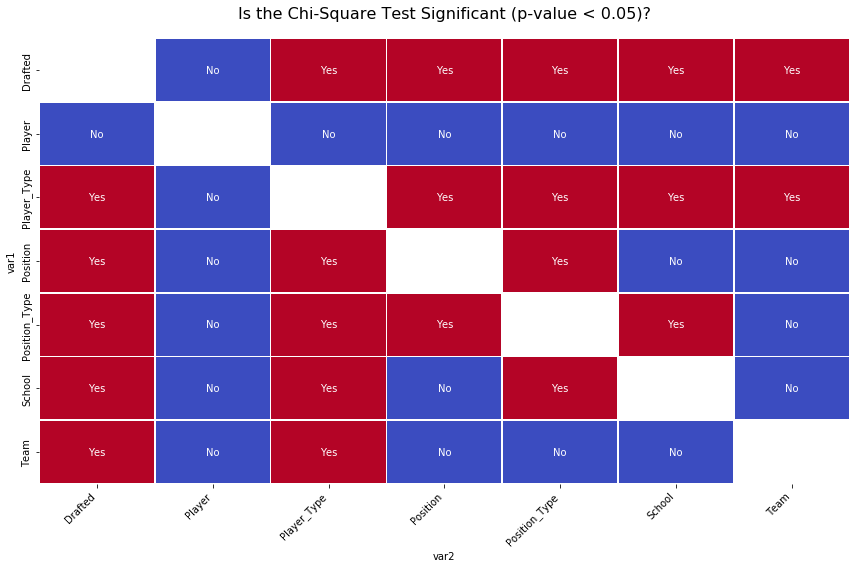

In [246]:
from itertools import product
import scipy.stats as ss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Identify categorical variables
df_cat = pd.DataFrame(data=df.dtypes, columns=['dtype']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['dtype'] == 'object'])
df_cat_v1 = df[cat_var].dropna()

# Define pairs of categorical variables
cat_var1 = ('Player', 'School', 'Player_Type', 'Position_Type', 'Position', 'Drafted', 'Team')
cat_var2 = ('Player', 'School', 'Player_Type', 'Position_Type', 'Position', 'Drafted', 'Team')

# Generate all possible combinations between the variables
cat_var_prod = list(product(cat_var1, cat_var2, repeat=1))
result = []

# Perform Chi-Square test for each pair and store the p-values
for i in cat_var_prod:
    if i[0] != i[1]:
        # Compute the chi-squared test
        chi2, p, dof, ex = ss.chi2_contingency(pd.crosstab(df_cat_v1[i[0]], df_cat_v1[i[1]]))
        significance = 1 if p < 0.05 else 0  # Use numeric values 1 and 0
        result.append((i[0], i[1], p, significance))

# Convert the result to a DataFrame
chi_test_output = pd.DataFrame(result, columns=['var1', 'var2', 'p_value', 'Significant'])

# Pivot the results to create a matrix for the heatmap
chi_test_pivot = chi_test_output.pivot(index='var1', columns='var2', values='Significant')

# Create a corresponding annotation matrix with "Yes" or "No"
annotation_matrix = chi_test_pivot.applymap(lambda x: 'Yes' if x == 1 else 'No')

# Plot the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(chi_test_pivot, annot=annotation_matrix, cmap='coolwarm', cbar=False, linewidths=0.5, fmt='')

# Customize the heatmap
plt.title('Is the Chi-Square Test Significant (p-value < 0.05)?', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the heatmap
plt.show()


### Summary Statistics: Draft Rounds

<b> Athletic Performance by Round: </b> It can be infered that the 1st round of the draft will have the players with the best overall athletic performances. Looking at the average stat per round, we find that later rounds have lower skilled players. Non-drafted players (illustrated as round 8), will have the lowest stats in all skills. Aditionally, we create a composite score between mesure between 0 and 1. The lowest / best performances on 'Sprint_40yd', 'Agility_3cone', Shuttle, and highest performances on the bench press reps, and jumping drills will increase the composite score towards 1.

In [247]:
import pandas as pd

# Assuming 'df' is your DataFrame

# List of the columns to analyze
columns_to_analyze = ['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle']

# Define which columns to minimize and maximize
columns_to_minimize = ['Sprint_40yd', 'Agility_3cone', 'Shuttle']
columns_to_maximize = ['Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump']

def calculate_composite_score(grouped_df):
    # Normalize the data to bring everything to the same scale (0-1)
    position_means_min_normalized = (grouped_df[columns_to_minimize] - grouped_df[columns_to_minimize].min()) / (grouped_df[columns_to_minimize].max() - grouped_df[columns_to_minimize].min())
    position_means_max_normalized = (grouped_df[columns_to_maximize] - grouped_df[columns_to_maximize].min()) / (grouped_df[columns_to_maximize].max() - grouped_df[columns_to_maximize].min())

    # Since we want to minimize the columns in position_means_min, we subtract them from 1 to reverse the scale
    position_means_min_normalized = 1 - position_means_min_normalized

    # Combine the normalized scores into a single DataFrame
    combined_scores = position_means_min_normalized.join(position_means_max_normalized)

    # Calculate a composite score by averaging the normalized values
    combined_scores['Composite_Score'] = combined_scores.mean(axis=1)

    return combined_scores['Composite_Score']

# Group by 'Round' and calculate the mean for each of the selected columns
round_means = df.groupby('Round')[columns_to_analyze].mean()

# Calculate the composite score for each round
round_means['Composite_Score'] = calculate_composite_score(round_means)

# Sort the rounds by the composite score and get the top 10
top_10_rounds = round_means.sort_values(by='Composite_Score', ascending=False)

# Display the top 10 rounds and their corresponding stats
print("Rounds with the Best Composite Scores:")
top_10_rounds


Rounds with the Best Composite Scores:


,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Composite_Score
Round,,,,,,,
1,4.722837,85.367144,21.373391,296.175891,7.176508,4.371860,0.975682
4,4.718413,84.661824,20.043190,294.180713,7.185401,4.368232,0.832845
2,4.737194,84.976154,20.779203,294.642138,7.207073,4.382696,0.733145
3,4.748959,83.894917,20.520337,293.404540,7.226594,4.387843,0.544708
5,4.757675,83.003030,19.847749,290.315082,7.207900,4.378859,0.484494
6,4.752357,82.905371,19.479647,290.755905,7.207140,4.385650,0.452040
7,4.797399,82.658279,20.250081,288.347535,7.234162,4.406266,0.179376
8,4.805997,81.679971,18.203421,287.784386,7.233298,4.398998,0.034348


In [248]:
df.columns

Index(['Player', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone',
       'Shuttle', 'BMI', 'Player_Type', 'Position_Type', 'Position', 'Drafted',
       'Team', 'Round', 'Pick'],
      dtype='object')

<b> Most agile and fastest Position Type by round:</b> Looking at 40 yard sprint, Agility 3 cone, and shuttle drills, we find that the highest performing position is Defensive Back. Interestingly, we notice that most competitive draft rounds will.

In [249]:
import pandas as pd

# Assuming 'df' is your DataFrame

# List of the columns to analyze
columns_to_analyze = ['Sprint_40yd', 'Agility_3cone', 'Shuttle']

# Group by 'Round' and 'Position' and calculate the mean for each of the selected columns
round_position_means = df.groupby(['Round', 'Position_Type'])[columns_to_analyze].mean()

# Calculate the overall average across the specified columns for each group
round_position_means['Average'] = round_position_means.mean(axis=1)

# Find the position with the highest average stats in each round
best_position_by_round = round_position_means.groupby('Round')['Average'].idxmin()

# Extract the rows corresponding to the best positions for each round
best_position_stats = round_position_means.loc[best_position_by_round]

# Display the results
print("Position with the best average agility stats by round:")
best_position_stats

Position with the best average agility stats by round:


,,Sprint_40yd,Agility_3cone,Shuttle,Average
Round,Position_Type,,,,
1,Defensive Back,4.456203,6.865182,4.154165,5.158516
2,Defensive Back,4.492072,6.896803,4.177139,5.188671
3,Defensive Back,4.472987,6.897866,4.161160,5.177338
4,Defensive Back,4.492531,6.926457,4.193307,5.204098
5,Defensive Back,4.521494,6.915331,4.180594,5.205807
6,Defensive Back,4.530828,6.941127,4.205045,5.225667
7,Defensive Back,4.542764,6.957116,4.204321,5.234734
8,Defensive Back,4.570190,6.945549,4.202893,5.239544


<b> Slowest/least agile Position type by round</b> The position type with the worst performance in Sprint_40yd, Agility_3cone, and Shuttle drills tends to be Offensive Linemen positions. They tend to weigh more, and therefore tend to underperform in drills requiring agility or speed

In [250]:
import pandas as pd

# Assuming 'df' is your DataFrame

# List of the columns to analyze
columns_to_analyze = ['Sprint_40yd', 'Agility_3cone', 'Shuttle']

# Group by 'Round' and 'Position' and calculate the mean for each of the selected columns
round_position_means = df.groupby(['Round', 'Position_Type'])[columns_to_analyze].mean()

# Calculate the overall average across the specified columns for each group
round_position_means['Average'] = round_position_means.mean(axis=1)

# Find the position with the highest average stats in each round
worst_position_by_round = round_position_means.groupby('Round')['Average'].idxmax()

# Extract the rows corresponding to the best positions for each round
worst_position_stats = round_position_means.loc[worst_position_by_round]

# Display the results
print("Position with the worst stats by round:")
worst_position_stats

Position with the worst stats by round:


,,Sprint_40yd,Agility_3cone,Shuttle,Average
Round,Position_Type,,,,
1,Offensive Lineman,5.147322,7.670670,4.669668,5.829220
2,Offensive Lineman,5.192932,7.746736,4.706117,5.881928
3,Offensive Lineman,5.227252,7.787181,4.741303,5.918579
4,Offensive Lineman,5.256493,7.811779,4.757030,5.941767
5,Offensive Lineman,5.239311,7.817140,4.778223,5.944891
6,Offensive Lineman,5.244000,7.758147,4.738471,5.913540
7,Offensive Lineman,5.283333,7.791862,4.743176,5.939457
8,Offensive Lineman,5.295370,7.883381,4.806855,5.995202


<b> Most sought after Position Type: </b> Looking at each round, we find that defensive linemen tend to be drafted in the first rounds. Out of all the drafted players in the defensive linemen positions, more than 50% will be picked by the 3rd round. In comparison, kicking specialists will exceed 50% at the 7th round. 

In [251]:
import pandas as pd

# Initialize an empty list to store the data for each round
data = []

for i in range(1, 8):
    # Filter the DataFrame for players drafted in the current round
    round_df = df[df['Round'] == i]

    # Count the number of occurrences of each position in the current round
    position_counts_round = round_df['Position_Type'].value_counts()

    # Filter the DataFrame for drafted players
    drafted_players = df[df['Drafted'] == "Yes"]

    # Count the number of occurrences of each position for drafted players
    position_counts = drafted_players['Position_Type'].value_counts()

    # Calculate the percentage of each position in the current round relative to all drafted players
    percentage_total_position_round = position_counts_round / position_counts * 100

    # Fill NaN values with 0
    percentage_total_position_round = percentage_total_position_round.fillna(0)

    # Convert the Series to a DataFrame and add the round information
    round_data = percentage_total_position_round.reset_index()
    round_data.columns = ['Position_Type', f'Round_{i}_Percentage']
    
    # Append to the list
    data.append(round_data)

# Merge all the rounds' data into a single DataFrame
result_df = pd.concat(data, axis=1)

# Remove duplicate columns
result_df = result_df.loc[:,~result_df.columns.duplicated()]

# Display the DataFrame
result_df


,Position_Type,Round_1_Percentage,Round_2_Percentage,Round_3_Percentage,Round_4_Percentage,Round_5_Percentage,Round_6_Percentage,Round_7_Percentage
0,Backs/Receivers,13.246753,13.116883,15.324675,17.792208,13.766234,14.285714,12.467532
1,Defensive Back,13.932584,16.179775,16.404494,15.955056,16.853933,11.910112,8.764045
2,Defensive Lineman,18.681319,16.208791,19.780220,11.813187,9.890110,10.928962,13.186813
3,Kicking Specialist,0.000000,3.125000,3.125000,6.250000,50.000000,10.439560,15.625000
4,Linebacker,12.454212,15.384615,13.186813,18.681319,16.483516,12.087912,11.721612
5,Offensive Lineman,17.213115,14.480874,16.666667,14.207650,15.846995,21.875000,10.655738
6,Other Special,0.000000,0.000000,0.000000,0.000000,25.000000,75.000000,0.000000


### Athletic Stats: Drill Type

<b> Best performing position by drill type: </b><br><br>According to our findings, positions demonstrating the highest athleticism tend to be defensive positions, especially defensive back positions, which simulteanously excel is jumping, speed, and agility drills. Defensive Linemen perform the best at bench press, with a mean of 25 bench press reps.

In [252]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Count the number of players per position
position_counts = df['Position_Type'].value_counts()

# Filter to include only positions with 20 or more players
positions_with_20_or_more = position_counts[position_counts >= 20].index

# Filter the DataFrame to include only those positions
df_filtered = df[df['Position_Type'].isin(positions_with_20_or_more)]

# Columns to analyze for lowest and highest averages
columns_to_minimize_speed = ['Sprint_40yd', 'Agility_3cone', 'Shuttle']
columns_to_maximize_jump = ['Vertical_Jump', 'Broad_Jump']
columns_to_maximize_strength = ['Bench_Press_Reps']

# Group by 'Position_Type' and calculate the mean for each of the selected columns within the filtered DataFrame
position_means_min_speed = df_filtered.groupby('Position_Type')[columns_to_minimize_speed].mean()
position_means_max_jump = df_filtered.groupby('Position_Type')[columns_to_maximize_jump].mean()
position_means_max_strength = df_filtered.groupby('Position_Type')[columns_to_maximize_strength].mean()


# Calculate the overall mean for minimizing and maximizing columns
position_means_min_speed['Average_Min'] = position_means_min_speed.mean(axis=1)
position_means_max_jump['Average_Max'] = position_means_max_jump.mean(axis=1)
position_means_max_strength['Average_Max'] = position_means_max_strength.mean(axis=1)

# Find the position with the lowest average for minimizing columns
position_with_best_speed = position_means_min_speed['Average_Min'].idxmin()
lowest_avg_value = position_means_min_speed.loc[position_with_best_speed, 'Average_Min']

# Find the position with the highest average for maximizing columns
position_with_highest_avg_strength= position_means_max_strength['Average_Max'].idxmax()
highest_avg_value1 = position_means_max_strength.loc[position_with_highest_avg_strength, 'Average_Max']

# Find the position with the highest average for maximizing columns
position_with_highest_avg_jump = position_means_max_jump['Average_Max'].idxmax()
highest_avg_value2 = position_means_max_jump.loc[position_with_highest_avg_jump, 'Average_Max']

# Calculate the mean of the lowest and highest averages
mean_of_avgs = (lowest_avg_value + highest_avg_value1 + highest_avg_value2) / 2

# Display the results
print(f"Position with the lowest average for {columns_to_minimize_speed}: {position_with_best_speed}, Average: {lowest_avg_value:.2f}")
print(f"Position with the highest average for {columns_to_maximize_strength}: {position_with_highest_avg_strength}, Average: {highest_avg_value1:.2f}")
print(f"Position with the highest average for {columns_to_maximize_jump}: {position_with_highest_avg_jump}, Average: {highest_avg_value2:.2f}")

print(f"Mean of the lowest and highest averages: {mean_of_avgs:.2f}")


Position with the lowest average for ['Sprint_40yd', 'Agility_3cone', 'Shuttle']: Defensive Back, Average: 5.21
Position with the highest average for ['Bench_Press_Reps']: Defensive Lineman, Average: 25.70
Position with the highest average for ['Vertical_Jump', 'Broad_Jump']: Defensive Back, Average: 199.29
Mean of the lowest and highest averages: 115.10


<b> Worst performing position by drill type </b> Unsurprisingly, we find that Offensive linemen perform the worst at drills involving speed, agility, or jumping. This is consistent with our previous results

In [253]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Count the number of players per position
position_counts = df['Position_Type'].value_counts()

# Filter to include only positions with 20 or more players
positions_with_20_or_more = position_counts[position_counts >= 20].index

# Filter the DataFrame to include only those positions
df_filtered = df[df['Position_Type'].isin(positions_with_20_or_more)]

# Columns to analyze for lowest and highest averages
columns_to_minimize_speed = ['Sprint_40yd', 'Agility_3cone', 'Shuttle']
columns_to_maximize_jump = ['Vertical_Jump', 'Broad_Jump']
columns_to_maximize_strength = ['Bench_Press_Reps']

# Group by 'Position_Type' and calculate the mean for each of the selected columns within the filtered DataFrame
position_means_min_speed = df_filtered.groupby('Position_Type')[columns_to_minimize_speed].mean()
position_means_max_jump = df_filtered.groupby('Position_Type')[columns_to_maximize_jump].mean()
position_means_max_strength = df_filtered.groupby('Position_Type')[columns_to_maximize_strength].mean()

# Calculate the overall mean for minimizing and maximizing columns
position_means_min_speed['Average_Min'] = position_means_min_speed.mean(axis=1)
position_means_max_jump['Average_Max_Jump'] = position_means_max_jump.mean(axis=1)
position_means_max_strength['Average_Max_Strength'] = position_means_max_strength.mean(axis=1)

# Find the positions with the lowest and highest averages
position_with_best_speed = position_means_min_speed['Average_Min'].idxmin()
lowest_avg_value_speed = position_means_min_speed.loc[position_with_best_speed, 'Average_Min']

position_with_highest_avg_jump = position_means_max_jump['Average_Max_Jump'].idxmax()
highest_avg_value_jump = position_means_max_jump.loc[position_with_highest_avg_jump, 'Average_Max_Jump']

position_with_highest_avg_strength = position_means_max_strength['Average_Max_Strength'].idxmax()
highest_avg_value_strength = position_means_max_strength.loc[position_with_highest_avg_strength, 'Average_Max_Strength']

# Combine the results into a single DataFrame
results_df = pd.DataFrame({
    'Position_Type': [
        position_with_best_speed, 
        position_with_highest_avg_jump, 
        position_with_highest_avg_strength
    ],
    'Metric': [
        'Best Speed (Lowest Average Min)', 
        'Best Jump (Highest Average Max)', 
        'Best Strength (Highest Average Max)'
    ],
    'Value': [
        lowest_avg_value_speed, 
        highest_avg_value_jump, 
        highest_avg_value_strength
    ]
})

# Calculate the mean of the lowest and highest averages

# Add mean of averages to the DataFrame
results_df = results_df.append({
    'Position_Type': 'Overall',
    'Metric': 'Mean of Lowest and Highest Averages'
}, ignore_index=True)

# Display the results
results_df


/var/folders/qz/2_cjtz1d25729cwclbl0hk640000gn/T/ipykernel_5925/632978378.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


,Position_Type,Metric,Value
0,Defensive Back,Best Speed (Lowest Average Min),5.210324
1,Defensive Back,Best Jump (Highest Average Max),199.288062
2,Defensive Lineman,Best Strength (Highest Average Max),25.700299
3,Overall,Mean of Lowest and Highest Averages,NaN


### <b> Overall Athleticism </b>: Creation of a composite score

<b> Definition of the composite score: </b><br><br>To create a composite score for athleticism, we create a mesure between 0 and 1. The lowest / best performances on 'Sprint_40yd', 'Agility_3cone', Shuttle, and highest performances on the bench press reps, and jumping drills will increase the composite score towards 1. Otherwise, poor performances will decrease the score towards 0. <b> Results: </b>
1. The most athletic position is Cornerback
2. The most athletic position type is Defensive Back
3. The most athletic player is Byron Jones
4. The most athletic team is the Dallas Cowboys

<b> Best Overall athleticism by category</b>

In [254]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Columns to minimize and maximize
columns_to_minimize = ['Sprint_40yd', 'Agility_3cone', 'Shuttle']
columns_to_maximize = ['Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump']

def most_athletic(variable):
    # Group by the variable and calculate the mean for each of the selected columns
    position_means_min = df.groupby(variable)[columns_to_minimize].mean()
    position_means_max = df.groupby(variable)[columns_to_maximize].mean()

    # Normalize the data to bring everything to the same scale (0-1)
    position_means_min_normalized = (position_means_min - position_means_min.min()) / (position_means_min.max() - position_means_min.min())
    position_means_max_normalized = (position_means_max - position_means_max.min()) / (position_means_max.max() - position_means_max.min())

    # Since we want to minimize the columns in position_means_min, we subtract them from 1 to reverse the scale
    position_means_min_normalized = 1 - position_means_min_normalized

    # Combine the normalized scores into a single DataFrame
    combined_scores = position_means_min_normalized.join(position_means_max_normalized)

    # Calculate a composite score by averaging the normalized values
    combined_scores['Composite_Score'] = combined_scores.mean(axis=1)

    # Identify the position with the highest composite score
    best_position = combined_scores['Composite_Score'].idxmax()
    best_position_value = combined_scores.loc[best_position, 'Composite_Score']

    # Return the results as a dictionary
    return {
        'Variable': variable,
        'Best_Entity': best_position,
        'Composite_Score': best_position_value
    }

# Run the function for each variable and store the results
results = []
for variable in ['Position', 'Position_Type', 'Team', 'Player']:
    result = most_athletic(variable)
    results.append(result)

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Variable,Best_Entity,Composite_Score
0,Position,CB,0.820143
1,Position_Type,Defensive Back,0.868428
2,Team,Dallas Cowboys,0.838873
3,Player,Byron Jones,0.832155


<b> Worst Overall athleticism by category </b>

We find that Offensive Linemen have the lowest average composite scores, with the lowest position being Offensive Guard. The player with the lowest composite score is Isaiah Thompson, which had the record for the slowest 40 yard dash in 2011 (over 6 seconds).

<b> Results: </b>
1. The least athletic position is the Offensive Guard position
2. The least athletic position type is Offensive Guard position
3. The least athletic player is Isaiah
4. The team having drafted the least athletic players is the Dallas Cowboys

In [255]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Columns to minimize and maximize
columns_to_minimize = ['Sprint_40yd', 'Agility_3cone', 'Shuttle']
columns_to_maximize = ['Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump']

def least_athletic(variable):
    # Group by the variable and calculate the mean for each of the selected columns
    position_means_min = df.groupby(variable)[columns_to_minimize].mean()
    position_means_max = df.groupby(variable)[columns_to_maximize].mean()

    # Normalize the data to bring everything to the same scale (0-1)
    position_means_min_normalized = (position_means_min - position_means_min.min()) / (position_means_min.max() - position_means_min.min())
    position_means_max_normalized = (position_means_max - position_means_max.min()) / (position_means_max.max() - position_means_max.min())

    # Since we want to minimize the columns in position_means_min, we subtract them from 1 to reverse the scale
    position_means_min_normalized = 1 - position_means_min_normalized

    # Combine the normalized scores into a single DataFrame
    combined_scores = position_means_min_normalized.join(position_means_max_normalized)

    # Calculate a composite score by averaging the normalized values
    combined_scores['Composite_Score'] = combined_scores.mean(axis=1)

    # Identify the entity with the lowest composite score
    worst_entity = combined_scores['Composite_Score'].idxmin()
    worst_entity_value = combined_scores.loc[worst_entity, 'Composite_Score']

    # Return the results as a dictionary
    return {
        'Variable': variable,
        'Worst_Entity': worst_entity,
        'Composite_Score': worst_entity_value
    }

# Run the function for each variable and store the results
results = []
for variable in ['Position', 'Position_Type', 'Team', 'Player']:
    result = least_athletic(variable)
    results.append(result)

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Variable,Worst_Entity,Composite_Score
0,Position,OG,0.148024
1,Position_Type,Offensive Lineman,0.159809
2,Team,Los Angeles Rams,0.077029
3,Player,Isaiah Thompson,0.129584


<b> Adding Composite Score to each players </b>

In [256]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Columns to analyze for lowest and highest averages
columns_to_minimize = ['Sprint_40yd', 'Agility_3cone', 'Shuttle']
columns_to_maximize = ['Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump']

# Normalize the data for each player
df_normalized_min = (df[columns_to_minimize] - df[columns_to_minimize].min()) / (df[columns_to_minimize].max() - df[columns_to_minimize].min())
df_normalized_max = (df[columns_to_maximize] - df[columns_to_maximize].min()) / (df[columns_to_maximize].max() - df[columns_to_maximize].min())

# Reverse the scale for metrics that need to be minimized
df_normalized_min = 1 - df_normalized_min

# Combine the normalized metrics into a single DataFrame
df_combined = df_normalized_min.join(df_normalized_max)

# Calculate the composite score by averaging the normalized metrics for each player
df['Composite_Score'] = df_combined.mean(axis=1)

# Display the DataFrame with the new Composite_Score column
df.head()


,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Player_Type,Position_Type,Position,Drafted,Team,Round,Pick,Composite_Score
0,Beanie Wells,20.0,Ohio St.,1.8542,106.594207,4.38,85.090000,25.0,325.120000,7.083763,4.358944,31.004194,Offense,Backs/Receivers,RB,Yes,Arizona Cardinals,1,31,0.683505
1,Will Davis,22.0,Illinois,1.8796,118.387609,4.84,83.820000,27.0,292.100000,7.380000,4.450000,33.510073,Defense,Defensive Lineman,DE,Yes,Arizona Cardinals,6,204,0.586534
2,Herman Johnson,24.0,LSU,2.0066,165.107623,5.50,63.893789,21.0,243.153925,8.122168,4.949310,41.005821,Offense,Offensive Lineman,OG,Yes,Arizona Cardinals,5,167,0.316998
3,Rashad Johnson,23.0,Alabama,1.8034,92.079251,4.49,93.980000,15.0,304.800000,7.090000,4.230000,28.312463,Defense,Defensive Back,FS,Yes,Arizona Cardinals,3,95,0.651536
4,Cody Brown,22.0,Connecticut,1.8796,110.676538,4.76,92.710000,26.0,304.800000,7.100000,4.400000,31.327425,Defense,Linebacker,OLB,Yes,Arizona Cardinals,2,63,0.645438


<b> Most Athletic Team</b>

In [257]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Count the number of players per position
position_counts = df['Position_Type'].value_counts()

# Filter to include only positions with 20 or more players
positions_with_20_or_more = position_counts[position_counts >= 20].index

# Filter the DataFrame to include only those positions
df_filtered = df[df['Position_Type'].isin(positions_with_20_or_more)]
# Group by 'Team' and calculate the mean of the 'Composite_Score_Player' for each team
team_composite_means = df_filtered.groupby('Team')['Composite_Score'].mean().reset_index()

# Find the team with the highest average composite score
best_team = team_composite_means.loc[team_composite_means['Composite_Score'].idxmax()]

# Display the result
#print(f"Team with the highest average player composite score: {best_team['Team']}")
#print(f"Highest average composite score: {best_team['Composite_Score_Player']:.2f}")

# Optionally, display the entire ranking of teams by their average composite scores
team_composite_means = team_composite_means.sort_values(by='Composite_Score', ascending=False)
team_composite_means.head()

,Team,Composite_Score
8,Dallas Cowboys,0.612522
26,Philadelphia Eagles,0.605230
33,Tennessee Titans,0.604612
7,Cleveland Browns,0.601777
21,New Orleans Saints,0.601267


<b> Most Athletic School<b>

In [258]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Group by 'School' and calculate the mean of the 'Composite_Score_Player' for each school
school_composite_means = df_filtered.groupby('School')['Composite_Score'].mean().reset_index()

# Find the school with the highest average composite score
best_school = school_composite_means.loc[school_composite_means['Composite_Score'].idxmax()]


school_composite_means = school_composite_means.sort_values(by='Composite_Score', ascending=False)
school_composite_means

,School,Composite_Score
181,Saginaw Valley St.,0.737081
235,Washburn,0.729668
173,Presbyterian,0.716083
0,Abilene Christian,0.712438
71,Georgia Southern,0.699847
...,...,...
100,Kutztown Pennsylvania,0.376847
84,Humboldt St.,0.364527
59,Ferris St.,0.319871
5,Alabama A&M,0.312981


<b> Athleticism by Position Type average: </b> How ahtletic is a player in relation to his position type standard

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Composite_Score_Player' is the column with composite scores

# Group by 'Position_Type' and calculate the mean of the 'Composite_Score_Player' for each position
position_composite_means = df_filtered.groupby('Position_Type')['Composite_Score'].mean().reset_index()

# Sort the positions by their average composite score in descending order
position_composite_means = position_composite_means.sort_values(by='Composite_Score', ascending=False)

# Display the results
print(position_composite_means)

# Optional: Highlighting positions in the original DataFrame by merging the average composite score back to the original DataFrame
df_2 = df.merge(position_composite_means, on='Position_Type', suffixes=('', '_Position_Avg'))

# Display the first few rows to check the new column
df_2.head()


Average Composite Score by Position:
        Position_Type  Composite_Score
1      Defensive Back         0.658593
0     Backs/Receivers         0.622157
4          Linebacker         0.613877
3  Kicking Specialist         0.571450
2   Defensive Lineman         0.525256
5   Offensive Lineman         0.422813


,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,...,Player_Type,Position_Type,Position,Drafted,Team,Round,Pick,Composite_Score,Composite_Score_Position_Avg,Composite_Score_Position_Avg
0,Beanie Wells,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,7.083763,...,Offense,Backs/Receivers,RB,Yes,Arizona Cardinals,1,31,0.683505,0.64124,0.622157
1,Cedric Peerman,22.0,Virginia,1.7526,97.975952,4.34,101.60,27.0,297.18,6.990000,...,Offense,Backs/Receivers,RB,Yes,Baltimore Ravens,6,185,0.719394,0.64124,0.622157
2,Mike Goodson,21.0,Texas A&M,1.8288,94.347213,4.43,100.33,14.0,299.72,6.890000,...,Offense,Backs/Receivers,RB,Yes,Carolina Panthers,4,111,0.676959,0.64124,0.622157
3,Bernard Scott,25.0,Abilene Christian,1.7780,90.718474,4.44,91.44,21.0,317.50,6.820000,...,Offense,Backs/Receivers,RB,Yes,Cincinnati Bengals,6,209,0.714101,0.64124,0.622157
4,James Davis,23.0,Clemson,1.8034,98.883137,4.45,81.28,17.0,276.86,7.150000,...,Offense,Backs/Receivers,RB,Yes,Cleveland Browns,6,195,0.588544,0.64124,0.622157


In [259]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Composite_Score' is the column with composite scores

# Step 1: Group by 'Position_Type' and calculate the mean of the 'Composite_Score' for each position
position_composite_means = df.groupby('Position_Type')['Composite_Score'].mean().reset_index()

# Rename the column to indicate it's the average score per position
position_composite_means.rename(columns={'Composite_Score': 'Composite_Score_Position_Avg'}, inplace=True)

# Step 2: Merge the average composite score back into the original DataFrame
df = df.merge(position_composite_means, on='Position_Type', how='left')

# Step 3: Create a conditional column to check if the player's score is higher than the position average
df['Above_Position_Avg'] = df['Composite_Score'] > df['Composite_Score_Position_Avg']

# Optionally, convert the boolean values to "Yes" or "No"
df['Above_Position_Avg'] = df['Above_Position_Avg'].apply(lambda x: 'Yes' if x else 'No')

# Display the first few rows to check the new columns
df.head()

,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,...,Player_Type,Position_Type,Position,Drafted,Team,Round,Pick,Composite_Score,Composite_Score_Position_Avg,Above_Position_Avg
0,Beanie Wells,20.0,Ohio St.,1.8542,106.594207,4.38,85.090000,25.0,325.120000,7.083763,...,Offense,Backs/Receivers,RB,Yes,Arizona Cardinals,1,31,0.683505,0.622157,Yes
1,Will Davis,22.0,Illinois,1.8796,118.387609,4.84,83.820000,27.0,292.100000,7.380000,...,Defense,Defensive Lineman,DE,Yes,Arizona Cardinals,6,204,0.586534,0.525256,Yes
2,Herman Johnson,24.0,LSU,2.0066,165.107623,5.50,63.893789,21.0,243.153925,8.122168,...,Offense,Offensive Lineman,OG,Yes,Arizona Cardinals,5,167,0.316998,0.422813,No
3,Rashad Johnson,23.0,Alabama,1.8034,92.079251,4.49,93.980000,15.0,304.800000,7.090000,...,Defense,Defensive Back,FS,Yes,Arizona Cardinals,3,95,0.651536,0.658593,No
4,Cody Brown,22.0,Connecticut,1.8796,110.676538,4.76,92.710000,26.0,304.800000,7.100000,...,Defense,Linebacker,OLB,Yes,Arizona Cardinals,2,63,0.645438,0.613877,Yes


<b> What is the relationship between the composite score, and the probability of getting drafted?</b>

In [266]:
import pandas as pd
import scipy.stats as ss

# Assuming 'df' is your DataFrame and you've already created the 'Above_Position_Avg' column

# Let's also assume you have a 'Drafted' column with "Yes" or "No" indicating if the player was drafted

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Above_Position_Avg'], df['Drafted'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform a Chi-Square test to check for correlation
chi2, p, dof, expected = ss.chi2_contingency(contingency_table)

# Display the results
print(f"\nChi-Square Test Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("\nThere is a significant correlation between having an above average composite score in relation to the position type and the probability of being drafted.")
else:
    print("\nThere is no significant correlation between having a higher composite score in relation to the position type and the probability of being drafted.")


Contingency Table:
Drafted              No   Yes
Above_Position_Avg           
No                  759   954
Yes                 464  1300

Chi-Square Test Statistic: 122.75986332028035
P-Value: 1.5739023924047772e-28

There is a significant correlation between having an above average composite score in relation to the position type and the probability of being drafted.


In [264]:
df.head()

,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,...,Player_Type,Position_Type,Position,Drafted,Team,Round,Pick,Composite_Score,Composite_Score_Position_Avg,Above_Position_Avg
0,Beanie Wells,20.0,Ohio St.,1.8542,106.594207,4.38,85.090000,25.0,325.120000,7.083763,...,Offense,Backs/Receivers,RB,Yes,Arizona Cardinals,1,31,0.683505,0.622157,Yes
1,Will Davis,22.0,Illinois,1.8796,118.387609,4.84,83.820000,27.0,292.100000,7.380000,...,Defense,Defensive Lineman,DE,Yes,Arizona Cardinals,6,204,0.586534,0.525256,Yes
2,Herman Johnson,24.0,LSU,2.0066,165.107623,5.50,63.893789,21.0,243.153925,8.122168,...,Offense,Offensive Lineman,OG,Yes,Arizona Cardinals,5,167,0.316998,0.422813,No
3,Rashad Johnson,23.0,Alabama,1.8034,92.079251,4.49,93.980000,15.0,304.800000,7.090000,...,Defense,Defensive Back,FS,Yes,Arizona Cardinals,3,95,0.651536,0.658593,No
4,Cody Brown,22.0,Connecticut,1.8796,110.676538,4.76,92.710000,26.0,304.800000,7.100000,...,Defense,Linebacker,OLB,Yes,Arizona Cardinals,2,63,0.645438,0.613877,Yes


<b> Most ahtletic player by position, and their draft status</b>

In [271]:
import pandas as pd

# Assuming 'df' is your DataFrame and it already contains the 'Composite_Score' and 'Drafted' columns

# Step 1: Group by 'Position_Type' and find the player with the highest composite score in each position
highest_composite_per_position = df.loc[df.groupby('Position')['Composite_Score'].idxmax()]

# Step 2: Highlight whether the player got drafted or not
highest_composite_per_position['Draft_Status'] = highest_composite_per_position['Drafted'].apply(lambda x: 'Drafted' if x == 'Yes' else 'Not Drafted')

# Step 3: Select and order the relevant columns for display
highlighted_df = highest_composite_per_position[['Position', 'Player', 'Above_Position_Avg', 'Composite_Score','Composite_Score_Position_Avg', 'Draft_Status']]

# Display the final DataFrame
highlighted_df


,Position,Player,Above_Position_Avg,Composite_Score,Composite_Score_Position_Avg,Draft_Status
587,C,Jason Kelce,Yes,0.588880,0.422813,Drafted
1350,CB,Byron Jones,Yes,0.824863,0.658593,Drafted
3279,DB,Quenton Meeks,Yes,0.683888,0.658593,Not Drafted
1471,DE,Alvin Dupree,Yes,0.721503,0.525256,Drafted
847,DT,Mike Martin,Yes,0.650915,0.525256,Drafted
1708,FB,Dan Vitale,Yes,0.719430,0.622157,Drafted
72,FS,David Bruton,Yes,0.755234,0.658593,Drafted
817,ILB,Mychal Kendricks,Yes,0.729829,0.613877,Drafted
3390,K,Cole Tracy,Yes,0.681648,0.571450,Not Drafted
1434,LS,Joe Cardona,Yes,0.601415,0.517908,Drafted


### <b >Summary Statistics: Schools

We find that the majority of players get drafted, "With" 65% of the values in the "Drafted" column being "Yes"

In [ ]:
perc_drafted = len(df[df["Drafted"] == "Yes"]) / len(df) * 100
print("Percentage of drafted players:", perc_drafted)

Percentage of drafted players: 64.82599942479149


We can also identify the proportion of players being drafted for each school:

In [ ]:
c = df.groupby(["School", "Drafted"]).size().unstack()
c[np.isnan(c)] = 0
c = c.divide(c.sum(1), axis=0)
c

Drafted,No,Yes
School,,
Abilene Christian,0.000000,1.000000
Air Force,1.000000,0.000000
Akron,0.500000,0.500000
Ala-Birmingham,0.000000,1.000000
Alabama,0.247525,0.752475
...,...,...
William & Mary,0.200000,0.800000
Wisconsin,0.333333,0.666667
Wyoming,0.142857,0.857143


Out of 253 schools, we find that 47 of them had a very successful draft, with 100% of their players being drafted

In [ ]:
filtered_df = c[c['No'] == 0.0].sum()
filtered_df

Drafted
No      0.0
Yes    47.0
dtype: float64

Out of 253 schools, 48 of them had 0% of their players being drafted

In [ ]:
filtered_df = c[c['Yes'] == 0.0].sum()
filtered_df

Drafted
No     48.0
Yes     0.0
dtype: float64

We find that more schools present in our data have a majority of players being accepted to the draft: 145 schools with more than 50% of their prospects being drafted, and 82 having the most of their prospects being rejected from the draft. This seems to indicate that most of the schools will have a successful draft.

In [ ]:
highlighted_df = c[c['Yes'] > c['No']]
highlighted_df

Drafted,No,Yes
School,,
Abilene Christian,0.000000,1.000000
Ala-Birmingham,0.000000,1.000000
Alabama,0.247525,0.752475
Appalachian St.,0.272727,0.727273
Arizona,0.235294,0.764706
...,...,...
West. Michigan,0.300000,0.700000
Western Kentucky,0.111111,0.888889
William & Mary,0.200000,0.800000


In [ ]:
highlighted_df = c[c['Yes'] < c['No']]
highlighted_df

Drafted,No,Yes
School,,
Air Force,1.000000,0.000000
Alabama A&M,1.000000,0.000000
Alabama St.,1.000000,0.000000
Alcorn St.,1.000000,0.000000
Army,1.000000,0.000000
...,...,...
West Georgia,0.666667,0.333333
West Liberty,1.000000,0.000000
West Texas A&M,0.666667,0.333333


These results do not necesarily take into account the number of players being drafted. For instance, a school could only have 1 players presenting for the draft and be accepted, which will be accounted as 100% of the school's players being drafted. Let's compare these results with school having 3 or more players per school.

In [ ]:
c = df.groupby(["School", "Player"]).size().reset_index()

# Count the number of players per school
player_counts = c["School"].value_counts()

# Filter schools that have 10 or more players
schools_with_10_or_more = player_counts[player_counts >= 3]

# Filter the original dataframe to only include these schools
filtered_df = df[df["School"].isin(schools_with_10_or_more.index)]

# Display the filtered dataframe
c = filtered_df.groupby(["School", "Drafted"]).size().unstack()
c[np.isnan(c)] = 0
c = c.divide(c.sum(1), axis=0)

When only taking account schools with 3 players or more, we find a drastic reduction of schools with either: 100% of players being drafted, or 100% of the players getting rejected from the draft. Only 6 Schools with 3 players or more presenting for the draft will have 100% of their players accepted, and only 4 schools with 3 players or more will have all their players rejected from the draft.

In [ ]:
filtered_df = c[c['No'] == 0.0].sum()
filtered_df

Drafted
No     0.0
Yes    6.0
dtype: float64

In [ ]:
filtered_df = c[c['Yes'] == 0.0].sum()
filtered_df

Drafted
No     4.0
Yes    0.0
dtype: float64

This brings us to inspect the schools with the highest number of players getting drafted, and the proportion of drafted players for each respective school. We find that schools with the highest number of players considered for the draft, have a high proportion of players being drafted.

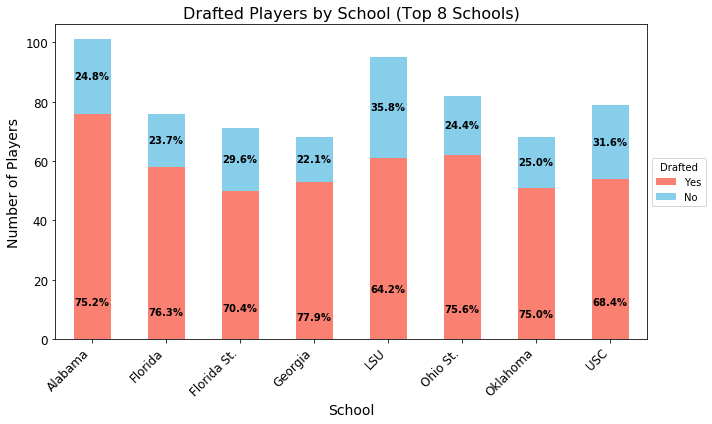

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'School' and 'Drafted' and get the count
Drafted_players_by_school = df.groupby(['School', 'Drafted']).size().reset_index(name='count')

# Get the top 5 schools based on the count of 'Yes'
top_schools = Drafted_players_by_school[
    Drafted_players_by_school['Drafted'] == 'Yes'
].sort_values(by='count', ascending=False)[:8]['School']

# Filter the original data to include only the top 5 schools
top_schools_data = Drafted_players_by_school[
    Drafted_players_by_school['School'].isin(top_schools)
]

# Pivot the data to have 'Yes' and 'No' in separate columns
pivot_data = top_schools_data.pivot(index='School', columns='Drafted', values='count').fillna(0)

# Calculate totals and percentages
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data['Yes%'] = (pivot_data['Yes'] / pivot_data['Total']) * 100
pivot_data['No%'] = (pivot_data['No'] / pivot_data['Total']) * 100

# Plotting
ax = pivot_data[['Yes', 'No']].plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(10, 6))

# Adding percentage annotations
for i in range(pivot_data.shape[0]):
    yes_count = pivot_data['Yes'].iloc[i]
    no_count = pivot_data['No'].iloc[i]
    total_count = pivot_data['Total'].iloc[i]
    
    yes_percent = pivot_data['Yes%'].iloc[i]
    no_percent = pivot_data['No%'].iloc[i]
    
    # Yes percentage on the orange part
    ax.text(i, no_count / 2, f'{yes_percent:.1f}%', ha='center', va='center', color='black', weight='bold')
    
    # No percentage on the blue part
    ax.text(i, yes_count + no_count / 2, f'{no_percent:.1f}%', ha='center', va='center', color='black', weight='bold')

# Customizing the plot
plt.title('Drafted Players by School (Top 8 Schools)', fontsize=16)
plt.ylabel('Number of Players', fontsize=14)
plt.xlabel('School', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Move the legend outside the plot
plt.legend(title="Drafted", loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout
plt.tight_layout()

plt.show()


Let's identify the schools with the highest average stats for their players. Since some schools only had 1-2 players presenting for the draft, the average mean stat for the drill might not be an accurate indication of whether the school has pre-dispositions for players being drafted. Let's look at schools with 10 players or more presenting to the draft.

Now let's compare the maximum average performance of the top schools against the overall average performance, the average performance for players drafted, and average performance for non-drafted players. We find that schools, with 30 players or more, and with the highest average performance in either of the drills, will tend to have a high proportion of drafted players. We chose schools with 30 players presenting for the draft to ensure that the results are less susceptible to variability

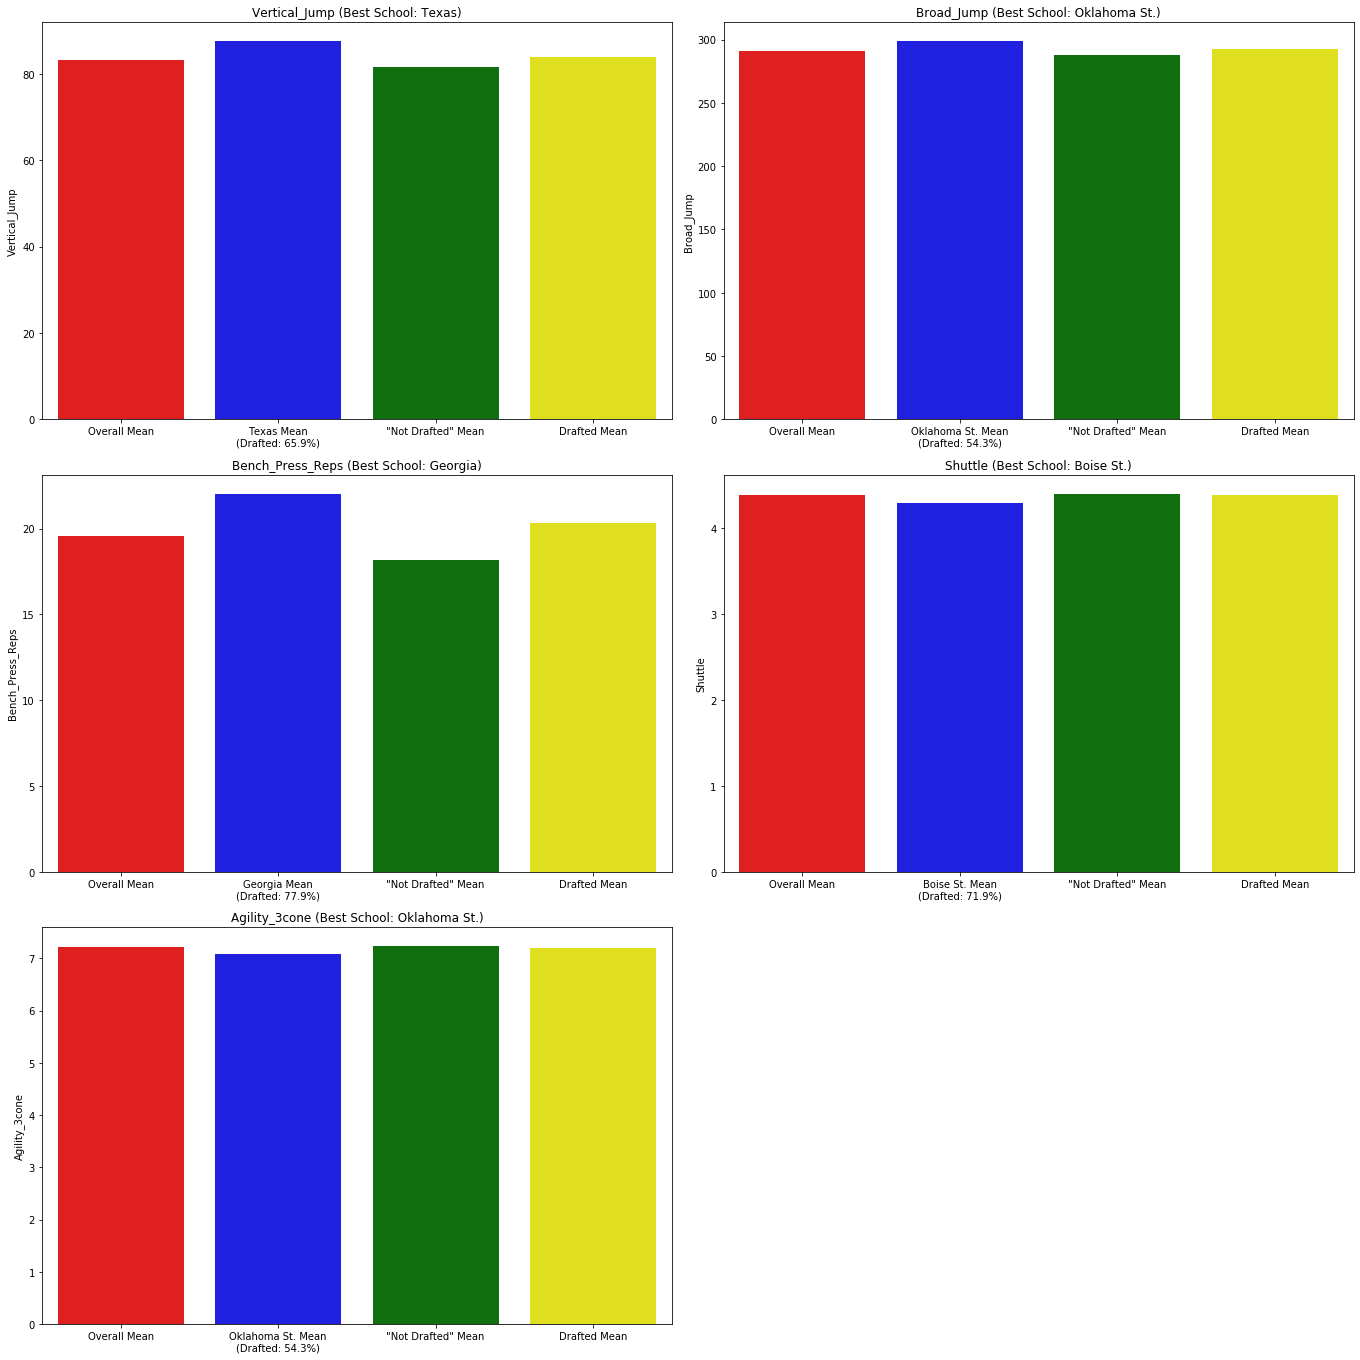

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter schools that have 30 or more players
schools_with_5_or_more = player_counts[player_counts >= 30]

# Filter the original dataframe to only include these schools
filtered_df = df[df["School"].isin(schools_with_5_or_more.index)]
# Group by 'School' and calculate the mean for each metric
school_means = filtered_df.groupby("School").mean()

# Identify the schools with the highest/lowest performance for each metric
highest_vertical_jump_school = school_means['Vertical_Jump'].idxmax()
highest_broad_jump_school = school_means['Broad_Jump'].idxmax()
highest_bench_press_school = school_means['Bench_Press_Reps'].idxmax()
lowest_shuttle_school = school_means['Shuttle'].idxmin()
lowest_agility_3cone_school = school_means['Agility_3cone'].idxmin()

# Create a dictionary of the best schools for each metric
best_schools = {
    'Vertical_Jump': highest_vertical_jump_school,
    'Broad_Jump': highest_broad_jump_school,
    'Bench_Press_Reps': highest_bench_press_school,
    'Shuttle': lowest_shuttle_school,
    'Agility_3cone': lowest_agility_3cone_school
}

# Calculate the percentage of players being drafted for each school
drafted_players_by_school = df.groupby(['School', 'Drafted']).size().reset_index(name='count')

# Pivot the data to have 'Yes' and 'No' in separate columns
pivot_data = drafted_players_by_school.pivot(index='School', columns='Drafted', values='count').fillna(0)

# Calculate totals and percentages
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data['Drafted%'] = (pivot_data['Yes'] / pivot_data['Total']) * 100
# Define the competencies/skills
competencies = ['Vertical_Jump', 'Broad_Jump', 'Bench_Press_Reps', 'Shuttle', 'Agility_3cone']

# Create bar plots for each competency, showing the overall mean and the best school's mean
plt.figure(figsize=(19, 19))
for i, skill in enumerate(competencies, 1):
    plt.subplot(3, 2, i)
    
    # Calculate the overall mean
    overall_mean = df[skill].mean()
    
    # Identify the best school for the current skill
    best_school = best_schools[skill]
    best_school_mean = school_means.loc[best_school, skill]
    
    # Get the percentage of players drafted from the best school
    drafted_percentage = pivot_data.loc[best_school, 'Drafted%'] if best_school in pivot_data.index else 0
    
    # Calculate the mean for "Not Drafted" players
    not_drafted_mean = df[df['Drafted'] == 'No'][skill].mean()

    # Calculate the mean for "Drafted" players
    drafted_mean = df[df['Drafted'] == 'Yes'][skill].mean()
    
    # Plot the means using bar plots
    means = [overall_mean, best_school_mean, not_drafted_mean, drafted_mean]
    labels = [
        'Overall Mean',
        f'{best_school} Mean\n(Drafted: {drafted_percentage:.1f}%)',
        '"Not Drafted" Mean',
        "Drafted Mean"
    ]
    colors = ['red', 'blue', 'green', "yellow"]
    
    sns.barplot(x=labels, y=means, palette=colors)
    
    plt.title(f'{skill} (Best School: {best_school})')
    plt.ylabel(skill)

plt.tight_layout()
plt.show()


### <b> Teams with highest player stats </b>

In [ ]:
# Group by 'Team' and calculate the mean for each metric
team_means = df.groupby("Team").mean()

# Find the team with the highest 'Vertical_Jump', 'Broad_Jump', and 'Bench_Press_Reps'
highest_vertical_jump_team = team_means['Vertical_Jump'].idxmax()
highest_broad_jump_team = team_means['Broad_Jump'].idxmax()
highest_bench_press_team = team_means['Bench_Press_Reps'].idxmax()

# Find the team with the lowest 'Shuttle' and 'Agility_3cone'
lowest_shuttle_team = team_means['Shuttle'].idxmin()
lowest_agility_3cone_team = team_means['Agility_3cone'].idxmin()

# Create a DataFrame to display the results
result = pd.DataFrame({
    'Metric': ['Vertical_Jump', 'Broad_Jump', 'Bench_Press_Reps', 'Shuttle', 'Agility_3cone'],
    'Team': [highest_vertical_jump_team, highest_broad_jump_team, highest_bench_press_team, lowest_shuttle_team, lowest_agility_3cone_team],
    'Value': [
        team_means['Vertical_Jump'].max(),
        team_means['Broad_Jump'].max(),
        team_means['Bench_Press_Reps'].max(),
        team_means['Shuttle'].min(),
        team_means['Agility_3cone'].min()
    ]
})

# Display the results
result

,Metric,Team,Value
0,Vertical_Jump,Dallas Cowboys,86.667345
1,Broad_Jump,Dallas Cowboys,297.780412
2,Bench_Press_Reps,San Diego Chargers,22.174697
3,Shuttle,Dallas Cowboys,4.318745
4,Agility_3cone,Philadelphia Eagles,7.105488


Despite having the highest number of drafted players, none of the top 8 teams with the highest number of most drafted players appear to have the highest average player stats.

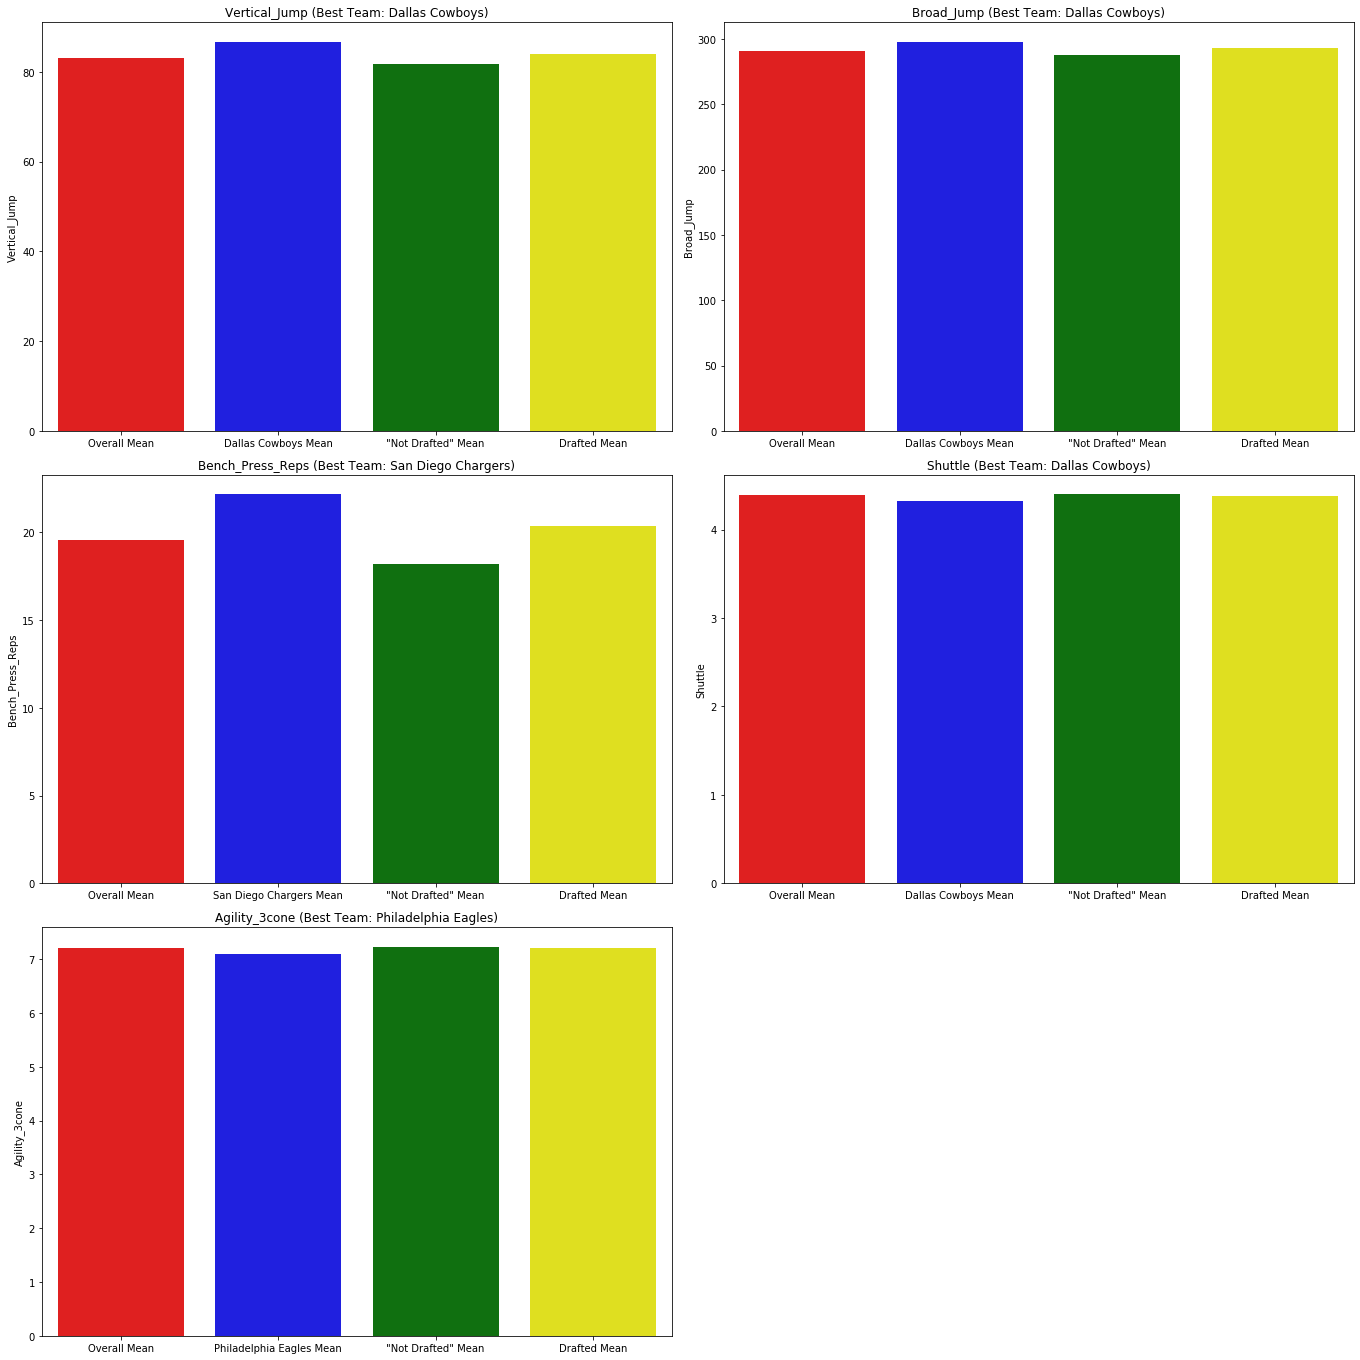

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Team' and calculate the mean for each metric
team_means = df.groupby("Team").mean()

# Identify the teams with the highest/lowest performance for each metric
highest_vertical_jump_team = team_means['Vertical_Jump'].idxmax()
highest_broad_jump_team = team_means['Broad_Jump'].idxmax()
highest_bench_press_team = team_means['Bench_Press_Reps'].idxmax()
lowest_shuttle_team = team_means['Shuttle'].idxmin()
lowest_agility_3cone_team = team_means['Agility_3cone'].idxmin()

# Create a dictionary of the best teams for each metric
best_teams = {
    'Vertical_Jump': highest_vertical_jump_team,
    'Broad_Jump': highest_broad_jump_team,
    'Bench_Press_Reps': highest_bench_press_team,
    'Shuttle': lowest_shuttle_team,
    'Agility_3cone': lowest_agility_3cone_team
}

# Define the competencies/skills
competencies = ['Vertical_Jump', 'Broad_Jump', 'Bench_Press_Reps', 'Shuttle', 'Agility_3cone']

# Create bar plots for each competency, showing the overall mean and the best team's mean
plt.figure(figsize=(19, 19))
for i, skill in enumerate(competencies, 1):
    plt.subplot(3, 2, i)
    
    # Calculate the overall mean
    overall_mean = df[skill].mean()
    
    # Identify the best team for the current skill
    best_team = best_teams[skill]
    best_team_mean = team_means.loc[best_team, skill]
    
    # Calculate the mean for "Not Drafted" players
    not_drafted_mean = df[df['Team'] == 'Not Drafted'][skill].mean()

    # Calculate the mean for "Not Drafted" players
    drafted_mean = df[df['Drafted'] == 'Yes'][skill].mean()
    
    # Plot the means using bar plots
    means = [overall_mean, best_team_mean, not_drafted_mean, drafted_mean]
    labels = ['Overall Mean', f'{best_team} Mean', '"Not Drafted" Mean', "Drafted Mean"]
    colors = ['red', 'blue', 'green', "yellow"]
    
    sns.barplot(x=labels, y=means, palette=colors)
    
    plt.title(f'{skill} (Best Team: {best_team})')
    plt.ylabel(skill)

plt.tight_layout()
plt.show()


### <b> When do players usually get drafted? </b>

We find that 22 years old is the most common age for players to get drafted based on our data with 933 being drafted at that age against 285 being rejected from the draft. Interestingly, we find a much higher proportion of players being rejected than accepted at 23 years old, wih 218/487 being rejected. As expected the older a player is, the less likely the player is to get drafted

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


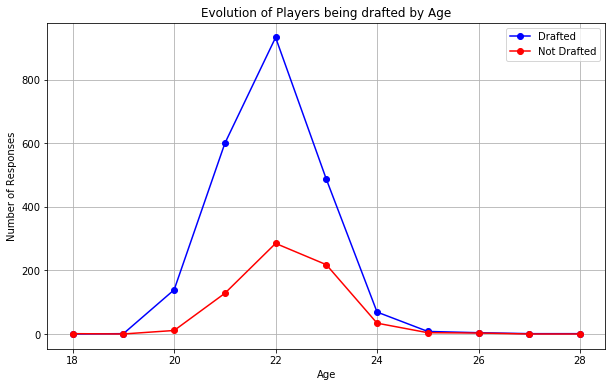

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'Age', 'Drafted', and possibly 'Gender' columns

# Grouping the data by age
age_groups = df.groupby(["Age"])

# Initialize lists to store the counts of 'Yes' and 'No' responses
yes_counts = []
no_counts = []

# Loop through each age group and count the 'Yes' and 'No' responses
for age, group in age_groups:
    yes_count = group["Drafted"].value_counts().get('Yes', 0)
    no_count = group["Drafted"].value_counts().get('No', 0)
    yes_counts.append((age, yes_count))
    no_counts.append((age, no_count))

# Convert to DataFrame for easy plotting
yes_df = pd.DataFrame(yes_counts, columns=['Age', 'Drafted'])
no_df = pd.DataFrame(no_counts, columns=['Age', 'Not Drafted'])

# Plotting the evolution of 'Yes' and 'No' responses
plt.figure(figsize=(10, 6))
plt.plot(yes_df['Age'], yes_df['Drafted'], marker='o', linestyle='-', color='blue', label='Drafted')
plt.plot(no_df['Age'], no_df['Not Drafted'], marker='o', linestyle='-', color='red', label='Not Drafted')
plt.title('Evolution of Players being drafted by Age')
plt.xlabel('Age')
plt.ylabel('Number of Responses')
plt.grid(True)
plt.legend()
plt.show()


While this show a general pattern of players being drafted by age, is the same for each position ?

By comparing each position, we find that the majority of players get drafted at 22 for most of positions. However, we do find that Running backs have a higher proportion of players drafted at 21. For QB, and P positions, the majority get drafted at 23 years old.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


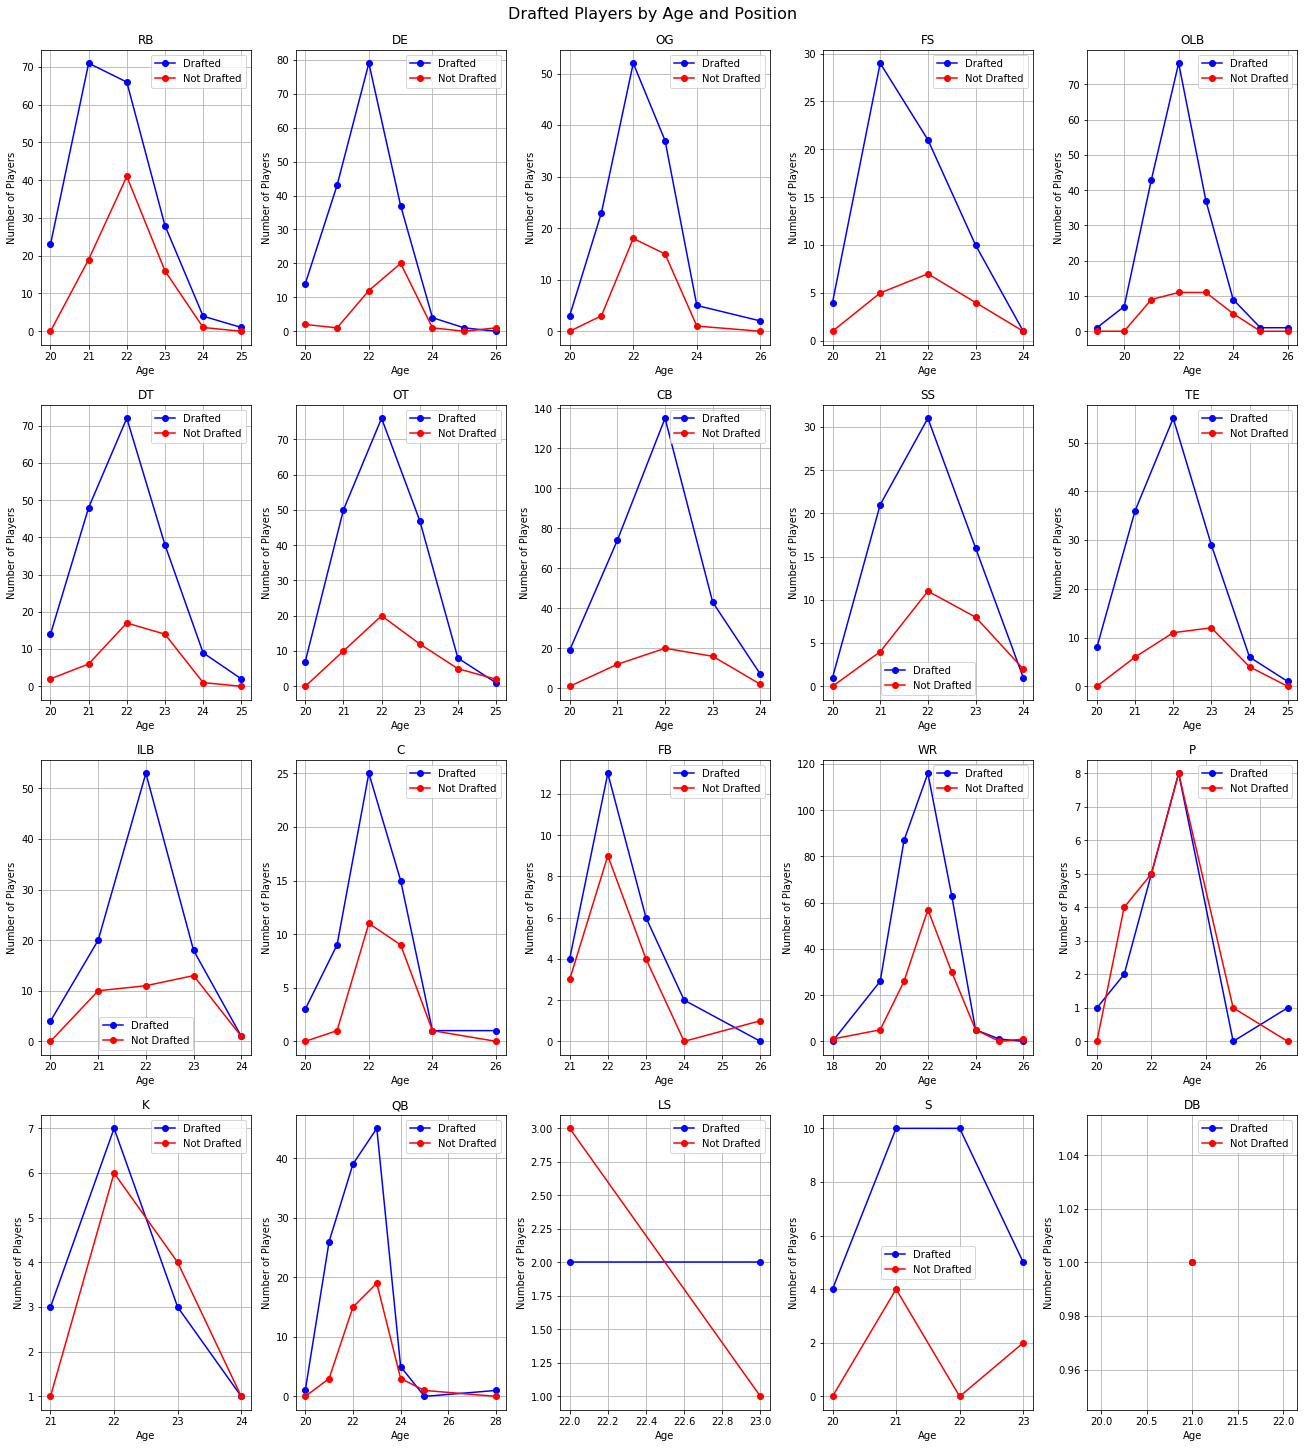

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Position, Age, and Drafted status
position_age_groups = df.groupby(["Position", "Age", "Drafted"]).size().unstack().fillna(0).reset_index()

# Unique positions and subplot layout
positions = df['Position'].unique()
n_cols = 5
n_rows = -(-len(positions) // n_cols)  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

# Plot each position
for i, position in enumerate(positions):
    pos_data = position_age_groups[position_age_groups['Position'] == position]
    axes[i].plot(pos_data['Age'], pos_data.get('Yes', 0), marker='o', linestyle='-', color='blue', label='Drafted')
    axes[i].plot(pos_data['Age'], pos_data.get('No', 0), marker='o', linestyle='-', color='red', label='Not Drafted')
    axes[i].set_title(position)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Number of Players')
    axes[i].grid(True)
    axes[i].legend()

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Drafted Players by Age and Position', fontsize=16)
plt.show()


### <b> Correlation Analysis: Which variables correlate? Are there any issues of collinearity within our data? </b>

In [ ]:
# Select only numerical columns and the 'drafted' column
numerical_columns = df.select_dtypes(include='number')
selected_columns = numerical_columns.copy()

# Ensure 'drafted' is in the selected columns
if 'drafted' not in selected_columns.columns:
    selected_columns['Drafted'] = df['Drafted']
selected_columns = selected_columns.loc[:, ["Weight", "Vertical_Jump", "Drafted"]]

Let's identify the moderate to strong correlations between our numerical variables:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is already populated with the necessary columns

# Separate the DataFrame based on Drafted status
df_drafted = df[df['Drafted'] == 'Yes'].drop(columns='Drafted')
df_nondrafted = df[df['Drafted'] == 'No'].drop(columns='Drafted')

# Function to calculate and filter correlations (including negative correlations)
def filter_correlations(df, min_corr, max_corr):
    corr_matrix = df.corr()
    filtered_corr = corr_matrix[((corr_matrix >= min_corr) & (corr_matrix <= max_corr)) | ((corr_matrix <= -min_corr) & (corr_matrix >= -max_corr))].dropna(axis=0, how='all').dropna(axis=1, how='all')
    return filtered_corr

# Calculate correlations for each group
corr_drafted = df_drafted.corr()
corr_nondrafted = df_nondrafted.corr()

# Filter correlations including both positive and negative correlations
moderate_corr_all = filter_correlations(df, 0.4, 0.6)
strong_corr_all = filter_correlations(df, 0.6, 0.8)
very_strong_corr_all = filter_correlations(df, 0.8, 0.99)

We find that variables associated to athletic performance will tend to be negatively affected by Weight. The exception is Bench Press reps, which requires strength, and in turn requires muscle mass (additional weight). Athletic performances will tend to have moderate to strong relationships between one another. Our results show that a higher number Bench press reps tend to negatively affect drills involving jumping, speed, or agility. This is consistent with our assumptions, since weight correlates with higher bench press reps. Since weight also negatively affects these drills, then these results make sense. Similarly, Height and BMI tends to show the same relationship with these other variables at significant level.

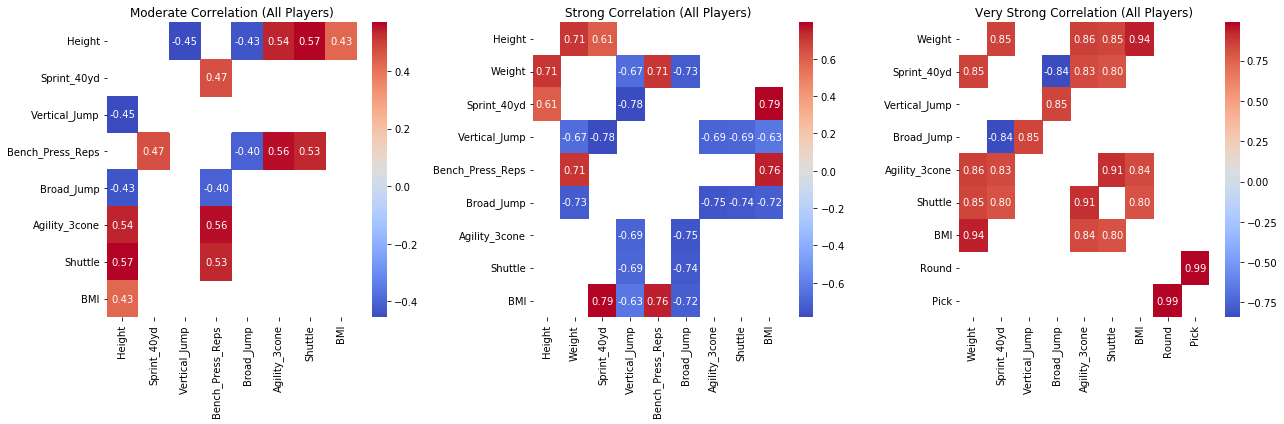

In [ ]:
# Set up the figure with three subplots for all players' correlations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Overall players' correlation heatmaps
if not moderate_corr_all.empty:
    sns.heatmap(moderate_corr_all, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
    axes[0].set_title("Moderate Correlation (All Players)")
if not strong_corr_all.empty:
    sns.heatmap(strong_corr_all, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
    axes[1].set_title("Strong Correlation (All Players)")
if not very_strong_corr_all.empty:
    sns.heatmap(very_strong_corr_all, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
    axes[2].set_title("Very Strong Correlation (All Players)")

plt.tight_layout()
plt.show()

<b> Comparing correlations differences based on whether the player gets drafted </b>

We find that the status of the drafted player has little change with regards to the correlation with other variables. Performance in the different drills seem to not differ based on whether the player gets draftred or not.

In [ ]:
df.columns
selected_columns = df.loc[:,['Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Sprint_40yd', "Shuttle", "Drafted"]]

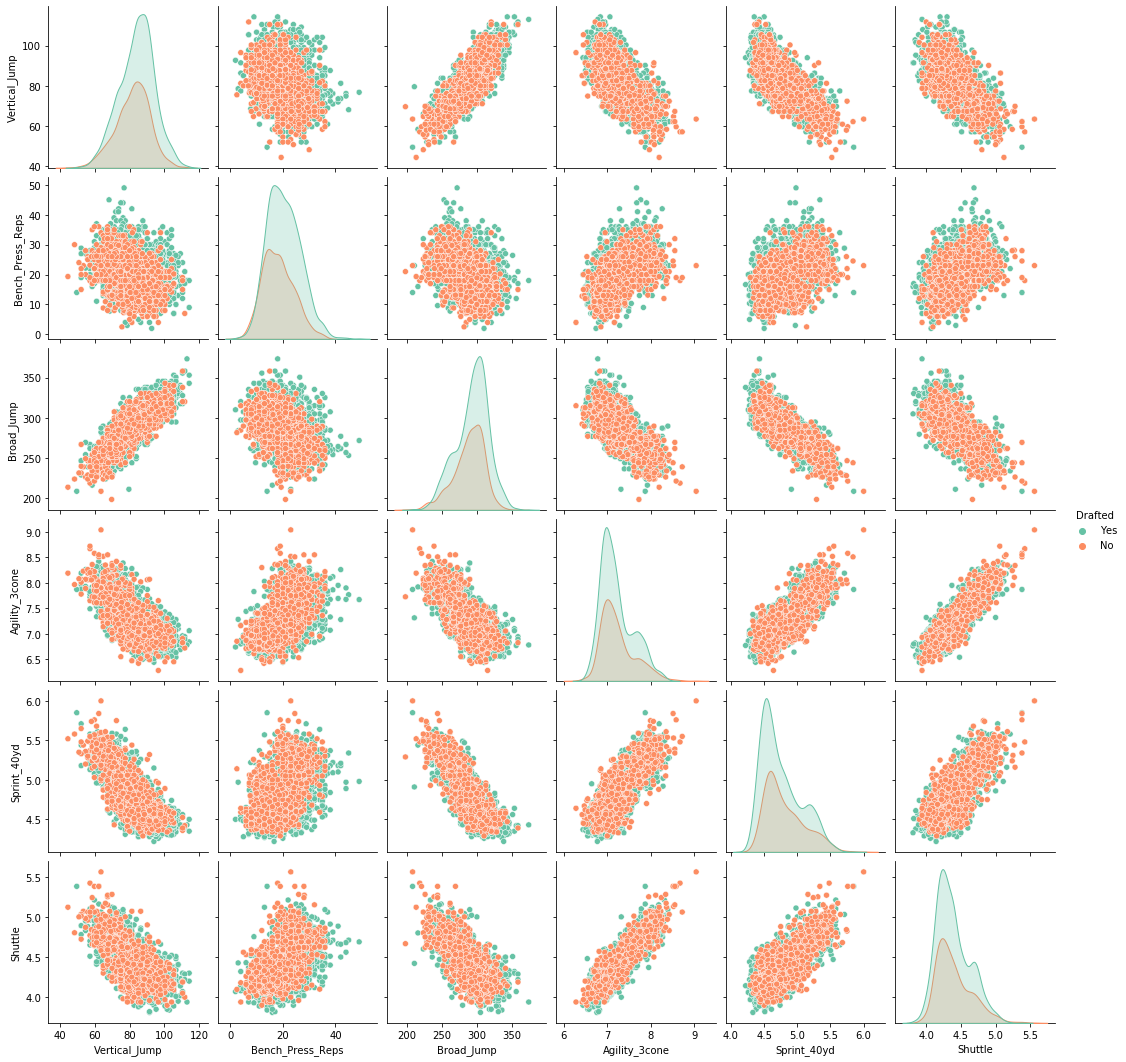

In [ ]:
sns.pairplot(selected_columns, hue = 'Drafted', palette = 'Set2')

Let's remove the Height and Weight columns:

In [ ]:
df = df.drop(columns=["Height", "Weight"])

In [ ]:
df.head()

,Player,Age,School,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,...,Round,Pick,Weight_Strat,Sprint_40yd_Strat,Broad_Jump_Strat,Agility_3cone_Strat,Vertical_Jump_Strat,Shuttle_Strat,BMI_Strat,Height_Strat
0,Beanie Wells,20.0,Ohio St.,4.38,85.09,25.0,325.12,NaN,NaN,31.004194,...,1,31,"(103.225, 110.353]","(4.347, 4.474]","(323.306, 335.824]",NaN,"(84.364, 89.354]",NaN,"(29.849, 31.497]","(1.836, 1.867]"
1,Will Davis,22.0,Illinois,4.84,83.82,27.0,292.10,7.38,4.45,33.510073,...,6,204,"(117.48, 124.608]","(4.729, 4.856]","(285.75, 298.269]","(7.266, 7.463]","(79.375, 84.364]","(4.435, 4.56]","(33.145, 34.793]","(1.867, 1.898]"
2,Herman Johnson,24.0,LSU,5.50,NaN,21.0,NaN,NaN,NaN,41.005821,...,5,167,"(160.248, 167.376]","(5.491, 5.619]",NaN,NaN,NaN,NaN,"(39.736, 41.384]","(1.99, 2.021]"
3,Rashad Johnson,23.0,Alabama,4.49,93.98,15.0,304.80,7.09,4.23,28.312463,...,3,95,"(88.969, 96.097]","(4.474, 4.601]","(298.269, 310.787]","(7.069, 7.266]","(89.354, 94.343]","(4.185, 4.31]","(28.201, 29.849]","(1.774, 1.805]"
4,Cody Brown,22.0,Connecticut,4.76,92.71,26.0,304.80,7.10,4.40,31.327425,...,2,63,"(110.353, 117.48]","(4.729, 4.856]","(298.269, 310.787]","(7.069, 7.266]","(89.354, 94.343]","(4.31, 4.435]","(29.849, 31.497]","(1.867, 1.898]"


### <b> Some schools might be have better training facilities and staff and therefore might have a greater chance of having drafter football players.

We might also be interested in looking at the percentage of players which are drafted:

In [ ]:
Drafted_players_by_school.sort_values(by=['count'], ascending=False)

,School,Drafted,count
26,Clemson,Yes,31
113,Ohio St.,Yes,26
114,Oklahoma,Yes,25
68,LSU,Yes,24
142,Stanford,Yes,23
...,...,...,...
74,Louisiana-Lafayette,Yes,1
72,Louisiana,Yes,1
71,Lindenwood,Yes,1
70,Liberty,Yes,1


In [ ]:
Num_player_school = df.groupby(['School','Player']).size().reset_index(name='count')["School"].value_counts()
Num_player_school

Clemson                 31
Ohio St.                26
Oklahoma                25
LSU                     24
Stanford                23
                        ..
Louisiana-Lafayette      1
Louisiana                1
Lindenwood               1
Liberty                  1
Missouri Western St.     1
Name: School, Length: 185, dtype: int64

# 4. Feature Selection 

# 5. Xgboost model

Only selecting relevant columns for the model

In [ ]:
df = df[['School','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle','Player_Type','Position_Type','Position','Drafted']]

Extracting feature and target arrays based on the dataset. Since our target are players getting drafter we will have it as our target and therefore store it inside of y.

In [ ]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = df.drop('Drafted', axis=1), df[['Drafted']]
# Encoding the target variable
df['Drafted'] = df['Drafted'].map({'yes': 1, 'no': 0})

We will need to change our categorical variables to numerical format to fit the model and therefore we will identify of the comlumsn are categorical.

We identify 4 categorical featues and will encode them as part of the one of the pre processing steps to train the model

In [ ]:
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]
categorical_cols

['Player', 'School', 'Player_Type', 'Position_Type', 'Position', 'Team']

Let's also identify the different Numerical columns

We will not need to encode them given the numerical format but we will need to later normalize them as part of one of the pre-processing steps.

In [ ]:
num_cols = [col for col in X.columns if X[col].dtype != "object"]
num_cols

['Age',
 'Height',
 'Weight',
 'Sprint_40yd',
 'Vertical_Jump',
 'Bench_Press_Reps',
 'Broad_Jump',
 'Agility_3cone',
 'Shuttle',
 'BMI',
 'Round',
 'Pick']

In [ ]:
mixed_columns = [col for col in X.columns if X[col].dtype == "object" and any (X[col].apply(lambda x:isinstance(x, (float, int))))]

XGBoost has the advantage of internally dealing with categorical variable, so we will leave it out as that. The only requirement is converting the non-numerical variables to "category"

In [ ]:
# Convert to Pandas category
for col in categorical_cols:
   X[col] = X[col].astype('category')


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Drafted  3477 non-null   object
dtypes: object(1)
memory usage: 27.3+ KB


Now we create the Training and testing sets for our model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

XGBoost has its own class for storing datasets calloedf DMatrix, which highly optimizes memory and speed. 

In [ ]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Player, School, Player_Type, Position_Type, Position, Team

We find a mix of categorical and numerical columns, which is useful for the creation of our model as usually Machine Learning models require label encoding for categorical variable. One particular feature of Xgboost regression is that there is no need for label ofn hot one encoding for categorical variables. This is useful to know and take into account when comparing to other machine learning models.

We have a total of 17 variables. Our target variable is the "Drafter" variable. The other explanatory variables that we are interested in using are the player, the year (some years might have a more competitive draft), the Age (players that are significantly older might tyrouble joining the draft), School (some schools are more competitive or may have better resources for training a player), 40 yard sprint; vertical jump, Bench press reps, BMI, Broad Jump, Player type; Position Type.  